In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from IPython.display import HTML
import pandas as pd
import numpy as np
import base64
import seaborn as sns
import os
import regex as re
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split


## Download data file

In [2]:
train_file = "/Users/ayadav/Documents/personal/DS/springboard/sql/Disease_Prediction/Training.csv"

In [3]:
test_file = "/Users/ayadav/Documents/personal/DS/springboard/sql/Disease_Prediction/Testing.csv"

In [4]:
df_train = pd.read_csv(train_file)

In [5]:
df_train

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
0           1          1                     1                    0   
1           0          1                     1                    0   
2           1          0                     1                    0   
3           1          1                     0                    0   
4           1          1                     1                    0   
...       ...        ...                   ...                  ...   
4915        0          0                     0                    0   
4916        0          1                     0                    0   
4917        0          0                     0                    0   
4918        0          1                     0                    0   
4919        0          1                     0                    0   

      shivering  chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0             0       0           0             0        0                 0   
1             0       0           0             0        0                 0   
2             0       0           0             0        0                 0   
3             0       0           0             0        0                 0   
4             0       0           0             0        0                 0   
...         ...     ...         ...           ...      ...               ...   
4915          0       0           0             0        0                 0   
4916          0       0           0             0        0                 0   
4917          0       0           0             0        0                 0   
4918          0       0           1             0        0                 0   
4919          0       0           0             0        0                 0   

      ...  scurring  skin_peeling  silver_like_dusting  small_dents_in_nails  \
0     ...         0             0                    0                     0   
1     ...         0             0                    0                     0   
2     ...         0             0                    0                     0   
3     ...         0             0                    0                     0   
4     ...         0             0                    0                     0   
...   ...       ...           ...                  ...                   ...   
4915  ...         0             0                    0                     0   
4916  ...         1             0                    0                     0   
4917  ...         0             0                    0                     0   
4918  ...         0             1                    1                     1   
4919  ...         0             0                    0                     0   

      inflammatory_nails  blister  red_sore_around_nose  yellow_crust_ooze  \
0                      0        0                     0                  0   
1                      0        0                     0                  0   
2                      0        0                     0                  0   
3                      0        0                     0                  0   
4                      0        0                     0                  0   
...                  ...      ...                   ...                ...   
4915                   0        0                     0                  0   
4916                   0        0                     0                  0   
4917                   0        0                     0                  0   
4918                   1        0                     0                  0   
4919                   0        1                     1                  1   

                                    prognosis  Unnamed: 133  
0                            Fungal infection           NaN  
1                            Fungal infection           NaN  
2                            Fungal infection           NaN  
3                            Fungal infection 

## Data Exploration

In [10]:
df_train.shape

(4920, 134)

In [11]:
df_test = pd.read_csv(test_file)

In [12]:
df_test

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0         1          1                     1                    0          0   
1         0          0                     0                    1          1   
2         0          0                     0                    0          0   
3         1          0                     0                    0          0   
4         1          1                     0                    0          0   
5         0          0                     0                    0          0   
6         0          0                     0                    0          0   
7         0          0                     0                    0          0   
8         0          0                     0                    0          0   
9         0          0                     0                    0          0   
10        0          0                     0                    0          0   
11        0          0                     0                    0          0   
12        0          0                     0                    0          0   
13        0          0                     0                    0          0   
14        1          0                     0                    0          0   
15        0          0                     0                    0          0   
16        1          1                     0                    0          0   
17        0          1                     0                    0          0   
18        0          0                     0                    0          0   
19        0          0                     0                    0          0   
20        1          0                     0                    0          0   
21        0          0                     0                    0          0   
22        0          0                     0                    0          0   
23        0          0                     0                    0          0   
24        0          0                     0                    0          0   
25        0          0                     0                    0          0   
26        0          0                     0                    1          0   
27        0          0                     0                    0          0   
28        0          0                     0                    0          0   
29        0          0                     0                    0          0   
30        0          0                     0                    0          0   
31        0          0                     0                    0          0   
32        0          0                     0                    0          0   
33        0          0                     0                    0          0   
34        0          0                     0                    0          0   
35        0          0                     0                    0          0   
36        0          0                     0                    0          0   
37        0          1                     0                    0          0   
38        0          0                     0                    0          0   
39        0          1                     0                    0          0   
40        0          1                     0                    0          0   
41        1          1                     0                    0          0   

    chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0        0           0             0        0                 0  ...   
1        1           0             0        0                 0  ...   
2        0           0             1        1                 1  ...   
3        0           0             0        0                 0  ...   
4        0           0             1        0                 0  ...   
5        0           0             0        0                 0  ...   
6        0           0             0        0              

In [9]:
df_test.shape

(42, 133)

In [10]:
df_train.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis',
       'Unnamed: 133'],
      dtype='object', length=134)

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 134 entries, itching to Unnamed: 133
dtypes: float64(1), int64(132), object(1)
memory usage: 5.0+ MB


In [12]:
df_train.describe()

itching    skin_rash  nodal_skin_eruptions  continuous_sneezing  \
count  4920.000000  4920.000000           4920.000000          4920.000000   
mean      0.137805     0.159756              0.021951             0.045122   
std       0.344730     0.366417              0.146539             0.207593   
min       0.000000     0.000000              0.000000             0.000000   
25%       0.000000     0.000000              0.000000             0.000000   
50%       0.000000     0.000000              0.000000             0.000000   
75%       0.000000     0.000000              0.000000             0.000000   
max       1.000000     1.000000              1.000000             1.000000   

         shivering       chills   joint_pain  stomach_pain      acidity  \
count  4920.000000  4920.000000  4920.000000   4920.000000  4920.000000   
mean      0.021951     0.162195     0.139024      0.045122     0.045122   
std       0.146539     0.368667     0.346007      0.207593     0.207593   
min       0.000000     0.000000     0.000000      0.000000     0.000000   
25%       0.000000     0.000000     0.000000      0.000000     0.000000   
50%       0.000000     0.000000     0.000000      0.000000     0.000000   
75%       0.000000     0.000000     0.000000      0.000000     0.000000   
max       1.000000     1.000000     1.000000      1.000000     1.000000   

       ulcers_on_tongue  ...   blackheads     scurring  skin_peeling  \
count       4920.000000  ...  4920.000000  4920.000000   4920.000000   
mean           0.021951  ...     0.021951     0.021951      0.023171   
std            0.146539  ...     0.146539     0.146539      0.150461   
min            0.000000  ...     0.000000     0.000000      0.000000   
25%            0.000000  ...     0.000000     0.000000      0.000000   
50%            0.000000  ...     0.000000     0.000000      0.000000   
75%            0.000000  ...     0.000000     0.000000      0.000000   
max            1.000000  ...     1.000000     1.000000      1.000000   

       silver_like_dusting  small_dents_in_nails  inflammatory_nails  \
count          4920.000000           4920.000000         4920.000000   
mean              0.023171              0.023171            0.023171   
std               0.150461              0.150461            0.150461   
min               0.000000              0.000000            0.000000   
25%               0.000000              0.000000            0.000000   
50%               0.000000              0.000000            0.000000   
75%               0.000000              0.000000            0.000000   
max               1.000000              1.000000            1.000000   

           blister  red_sore_around_nose  yellow_crust_ooze  Unnamed: 133  
count  4920.000000           4920.000000        4920.000000           0.0  
mean      0.023171              0.023171           0.023171           NaN  
std       0.150461              0.150461           0.150461           NaN  
min       0.000000              0.000000           0.000000           NaN  
25%       0.000000              0.000000           0.000000           NaN  
50%       0.000000              0.000000           0.000000           NaN  
75%       0.000000              0.000000           0.000000           NaN  
max       1.000000              1.000000           1.000000           NaN  

[8 rows x 133 columns]

In [40]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
            plt.ylabel('counts')
            plt.xticks(rotation = 90)
            plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [ ]:
plotPerColumnDistribution(df_train, 133, 5)

In [12]:
missing_var= df_train.isnull().sum()
print(missing_var)

itching                    0
skin_rash                  0
nodal_skin_eruptions       0
continuous_sneezing        0
shivering                  0
                        ... 
blister                    0
red_sore_around_nose       0
yellow_crust_ooze          0
prognosis                  0
Unnamed: 133            4920
Length: 134, dtype: int64


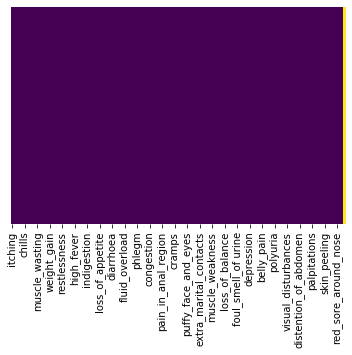

In [13]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [14]:
df_train_Target = df_train.drop[df_train['prognosis', 'Unnamed: 133']]

KeyError: ('prognosis', 'Unnamed: 133')

In [15]:
#df_group = df_train.groupby("prognosis").size().reset_index(name='counts')

In [16]:
for column in df_train 
df_train.groupby("prognosis").size().reset_index(name='counts')

SyntaxError: invalid syntax (<ipython-input-16-7b150ff3215c>, line 1)

In [17]:
# Bar Plot for all features
def plot_bar(feature):
    plt.figure(figsize=(10,50))
    sns.catplot(y=feature[:132], hue="Fungal infection", kind="count",
            palette="pastel", edgecolor=".6",
            data=df_group);

In [18]:
df_fungal =df_train.loc[df_train['prognosis'] == "Fungal infection"]
df_fungal

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
0           1          1                     1                    0   
1           0          1                     1                    0   
2           1          0                     1                    0   
3           1          1                     0                    0   
4           1          1                     1                    0   
...       ...        ...                   ...                  ...   
4715        1          1                     1                    0   
4756        1          1                     1                    0   
4797        1          1                     1                    0   
4838        1          1                     1                    0   
4879        1          1                     1                    0   

      shivering  chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0             0       0           0             0        0                 0   
1             0       0           0             0        0                 0   
2             0       0           0             0        0                 0   
3             0       0           0             0        0                 0   
4             0       0           0             0        0                 0   
...         ...     ...         ...           ...      ...               ...   
4715          0       0           0             0        0                 0   
4756          0       0           0             0        0                 0   
4797          0       0           0             0        0                 0   
4838          0       0           0             0        0                 0   
4879          0       0           0             0        0                 0   

      ...  scurring  skin_peeling  silver_like_dusting  small_dents_in_nails  \
0     ...         0             0                    0                     0   
1     ...         0             0                    0                     0   
2     ...         0             0                    0                     0   
3     ...         0             0                    0                     0   
4     ...         0             0                    0                     0   
...   ...       ...           ...                  ...                   ...   
4715  ...         0             0                    0                     0   
4756  ...         0             0                    0                     0   
4797  ...         0             0                    0                     0   
4838  ...         0             0                    0                     0   
4879  ...         0             0                    0                     0   

      inflammatory_nails  blister  red_sore_around_nose  yellow_crust_ooze  \
0                      0        0                     0                  0   
1                      0        0                     0                  0   
2                      0        0                     0                  0   
3                      0        0                     0                  0   
4                      0        0                     0                  0   
...                  ...      ...                   ...                ...   
4715                   0        0                     0                  0   
4756                   0        0                     0                  0   
4797                   0        0                     0                  0   
4838                   0        0                     0                  0   
4879                   0        0                     0                  0   

             prognosis  Unnamed: 133  
0     Fungal infection           NaN  
1     Fungal infection           NaN  
2     Fungal infection           NaN  
3     Fungal infection           NaN  
4     Fungal infection           NaN  
...                ...           ...  
4715  Fungal infectio

In [19]:
type(df_fungal.loc[df_fungal['continuous_sneezing'] == 1].size == 0)

numpy.bool_

In [20]:
for column in df_fungal:
    if (df_fungal.loc[df_fungal[column] == 1].size == 0):
       del df_fungal[column]    

In [21]:
df_fungal

itching  skin_rash  nodal_skin_eruptions  dischromic _patches
0           1          1                     1                    1
1           0          1                     1                    1
2           1          0                     1                    1
3           1          1                     0                    1
4           1          1                     1                    0
...       ...        ...                   ...                  ...
4715        1          1                     1                    1
4756        1          1                     1                    1
4797        1          1                     1                    1
4838        1          1                     1                    1
4879        1          1                     1                    1

[120 rows x 4 columns]

In [124]:
# Retrive particular disease and columns show symtoms for that particular disease
# Retrieve all records for given input disease and then removes columns which are not its symptoms.
def dis_name(disease_name,df):
    print(disease)
    # Retrieve all rows for given disease
    df_disease =df.loc[df['prognosis'] == disease_name]
    
    # Remove columns with no symptoms for current disease  
    for column in df_disease:
        if (df_disease.loc[df_disease[column] == 1].size == 0):
            del df_disease[column]
        
    df_gb = df_disease.groupby(list(df_disease.columns.values)).size()
    plot = df_gb.plot(kind = 'bar', title=disease_name,bottom=0.15)
    plt.show()
    return plot


Fungal infection


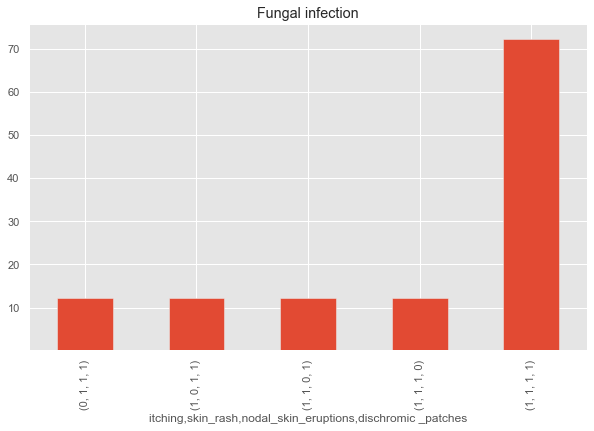

Allergy


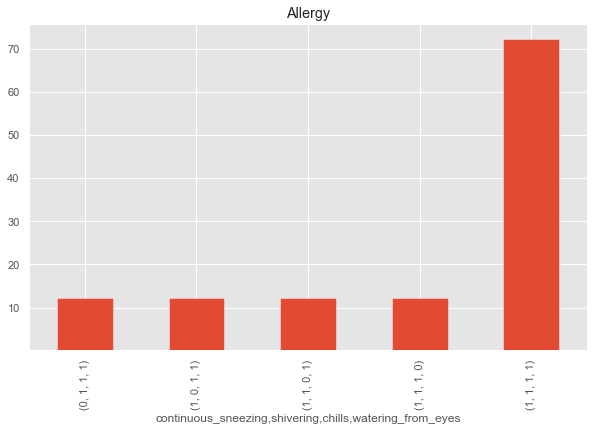

GERD


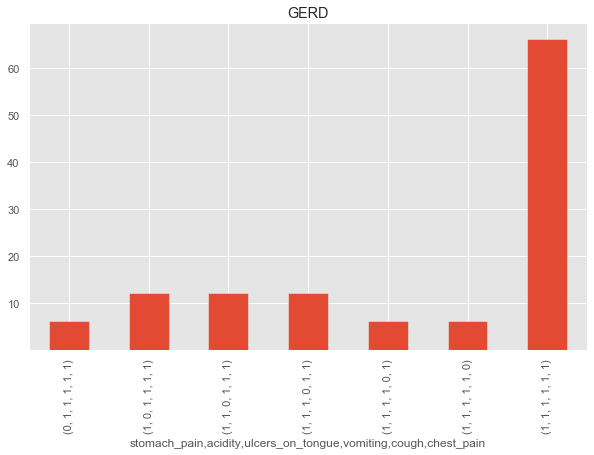

Chronic cholestasis


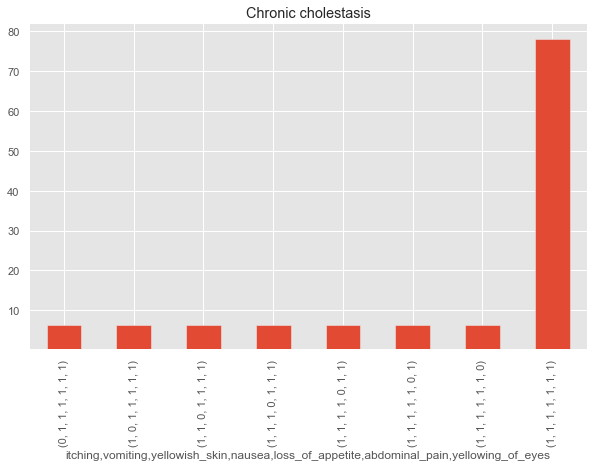

Drug Reaction


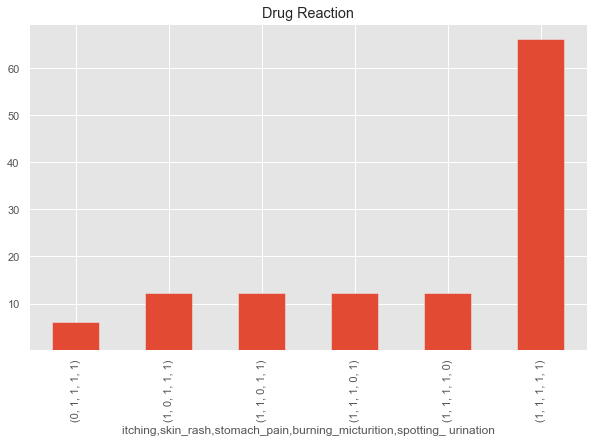

Peptic ulcer diseae


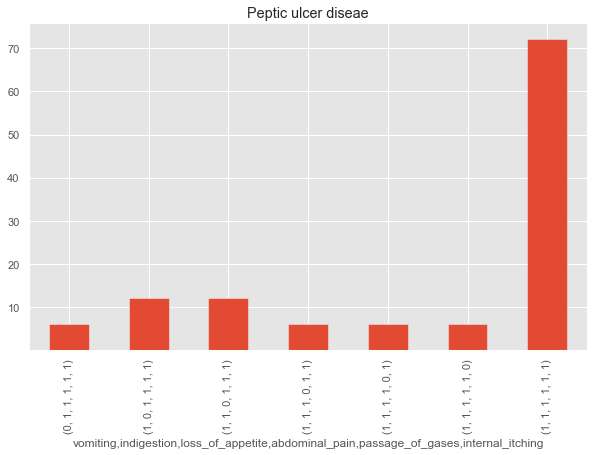

AIDS


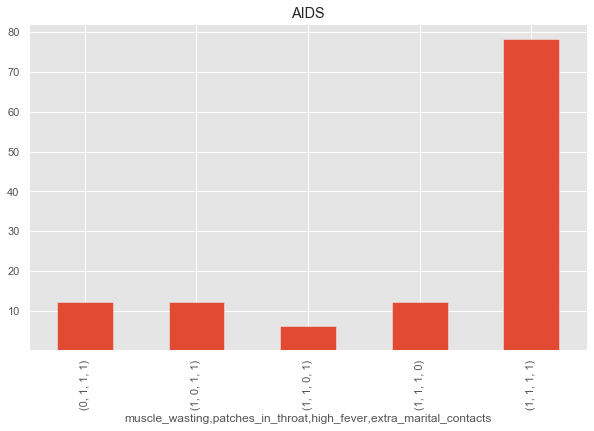

Diabetes 


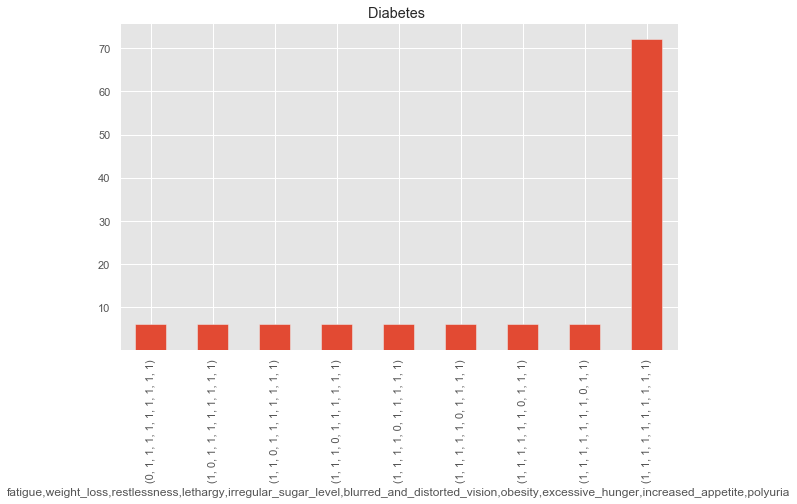

Gastroenteritis


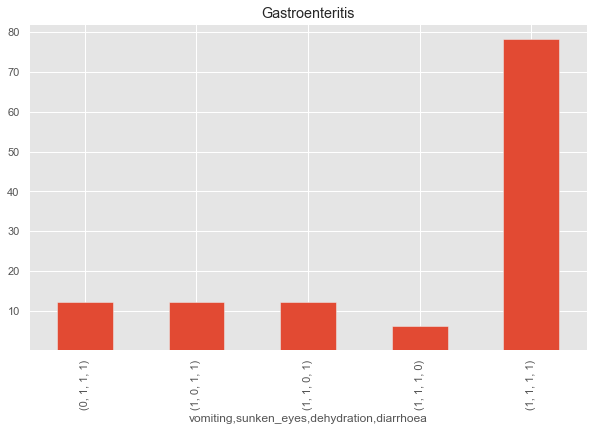

Bronchial Asthma


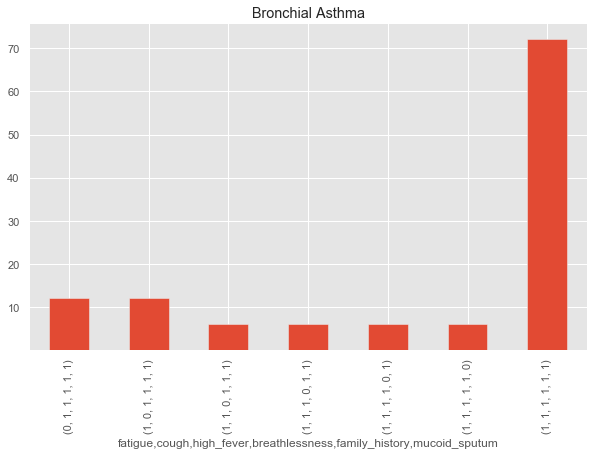

Hypertension 


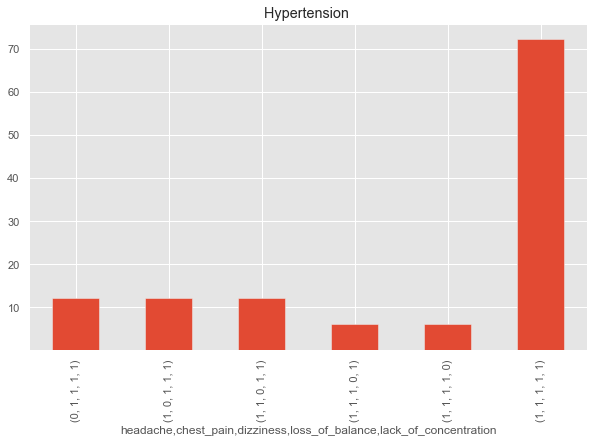

Migraine


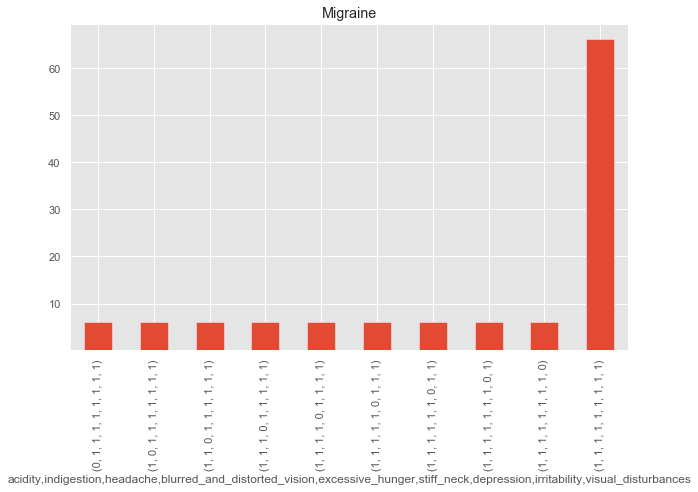

Cervical spondylosis


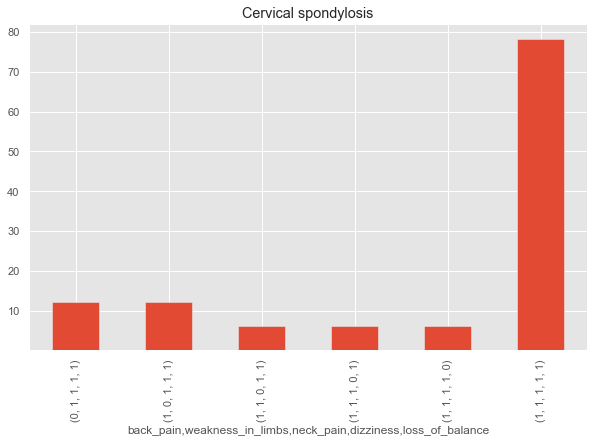

Paralysis (brain hemorrhage)


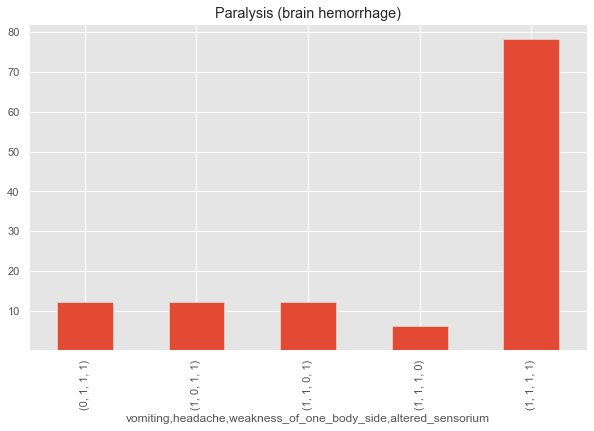

Jaundice


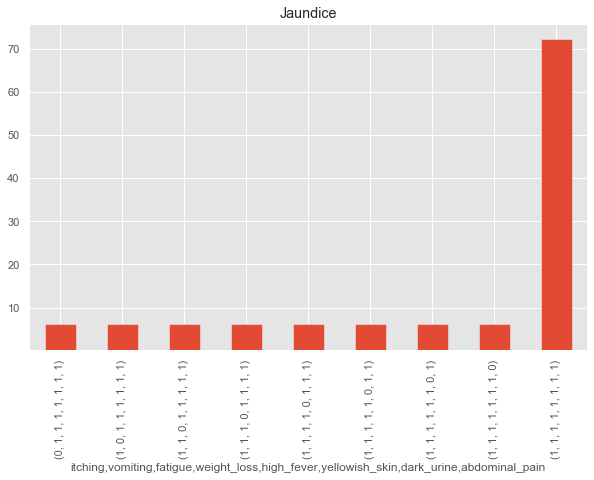

Malaria


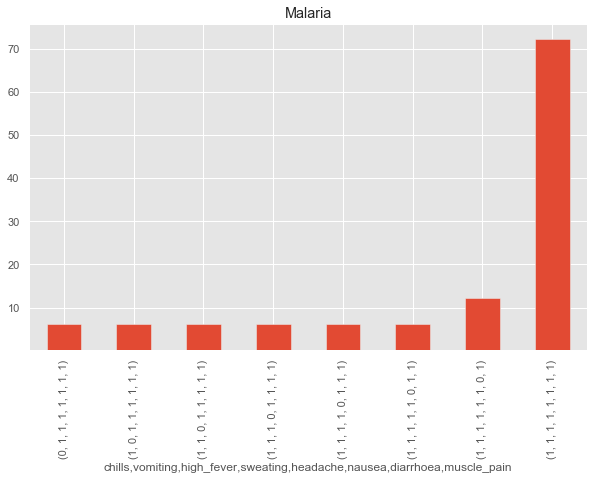

Chicken pox


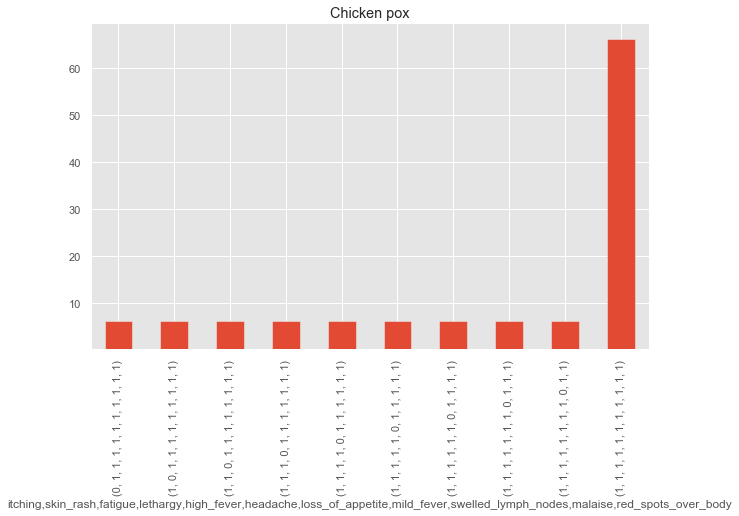

Dengue


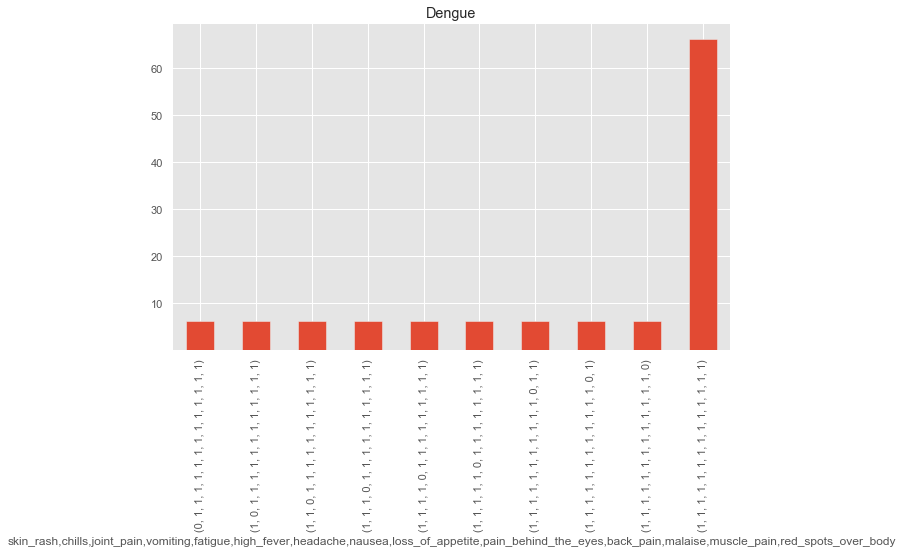

Typhoid


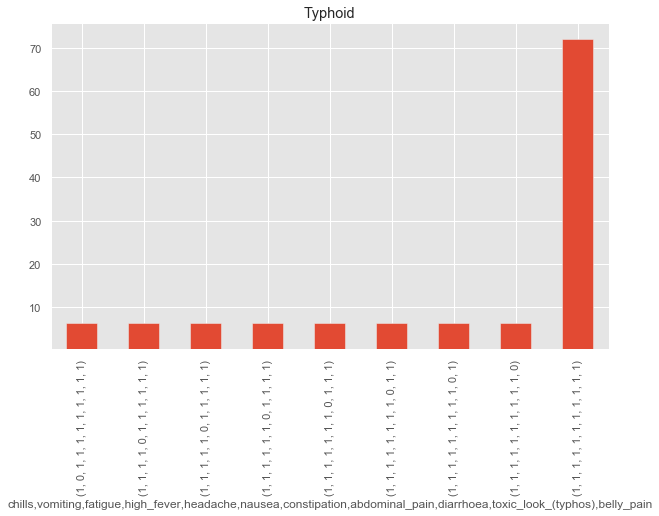

hepatitis A


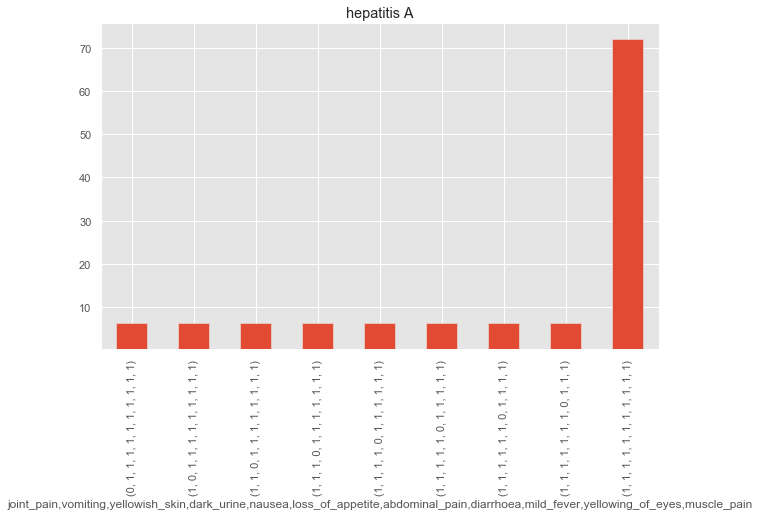

Hepatitis B


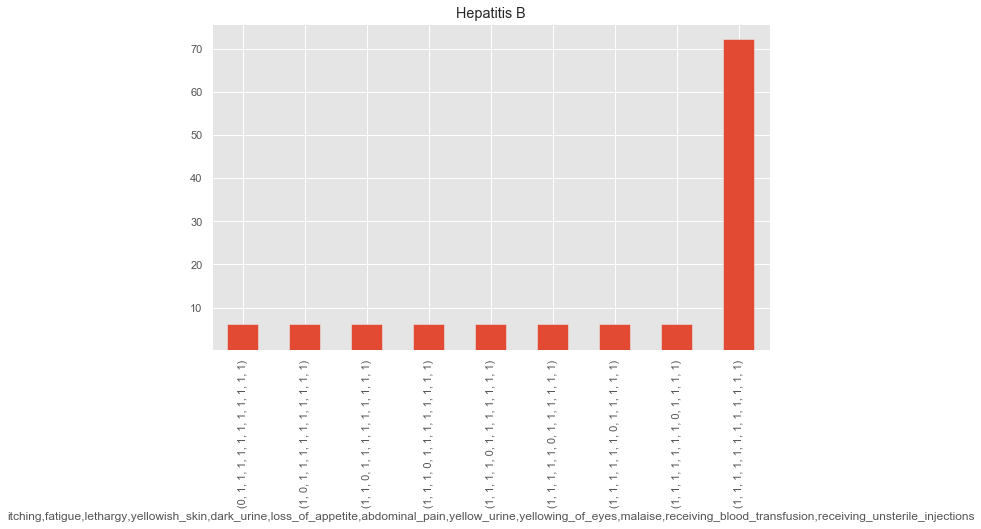

Hepatitis C


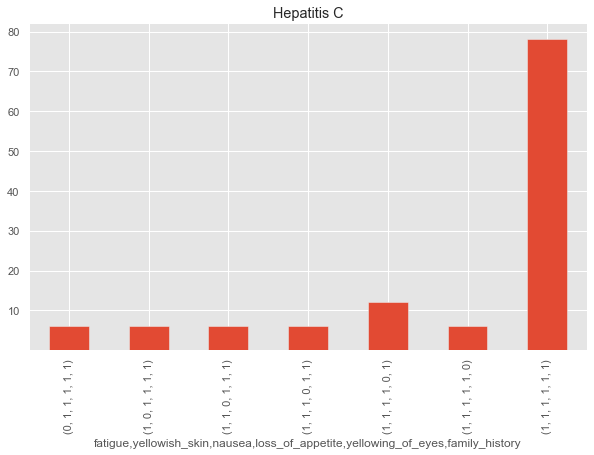

Hepatitis D


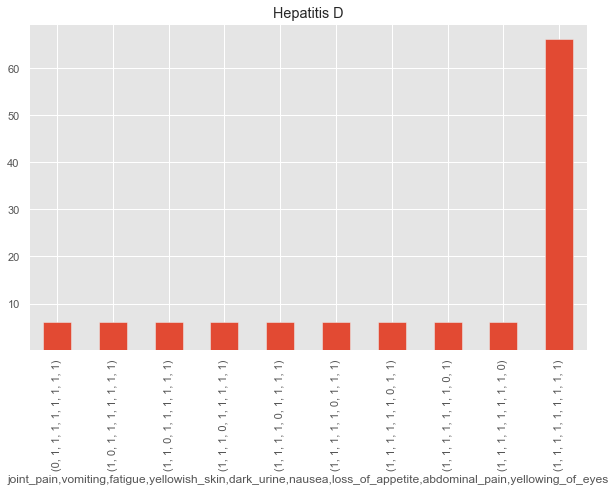

Hepatitis E


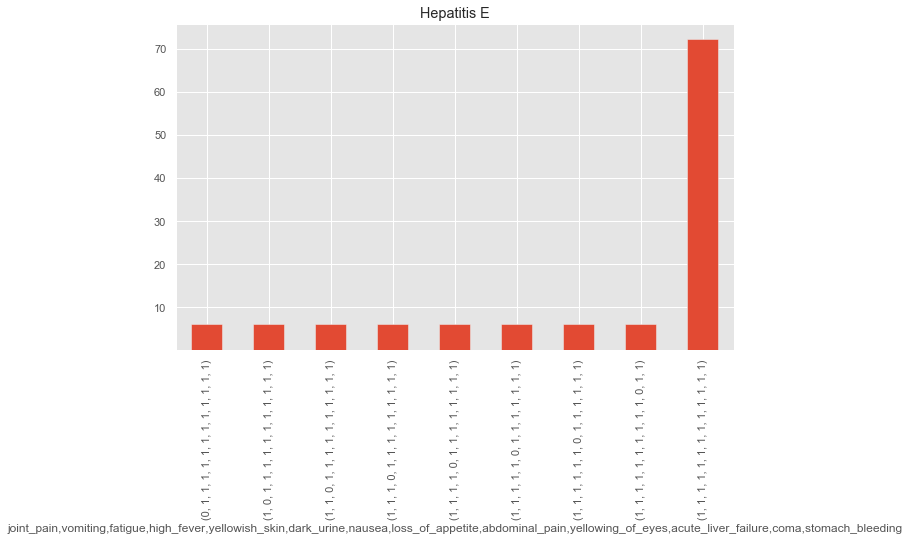

Alcoholic hepatitis


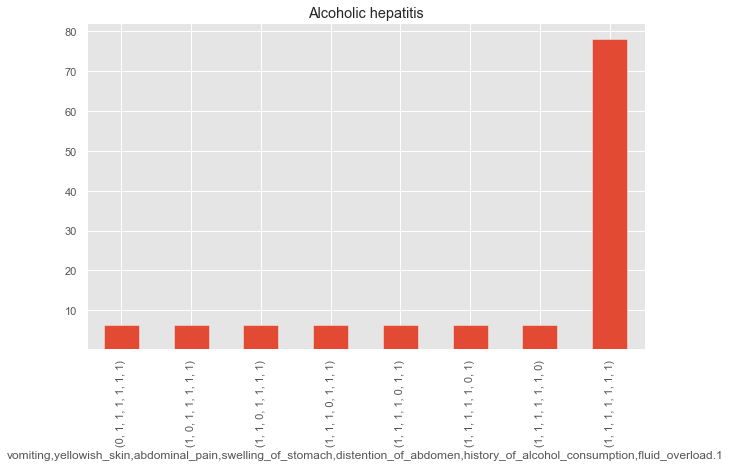

Tuberculosis


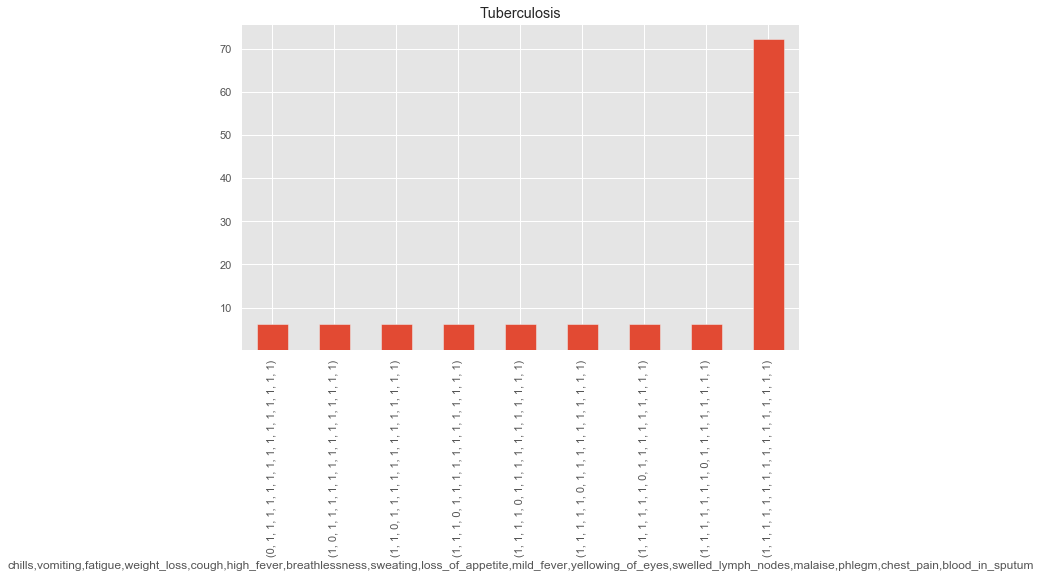

Common Cold


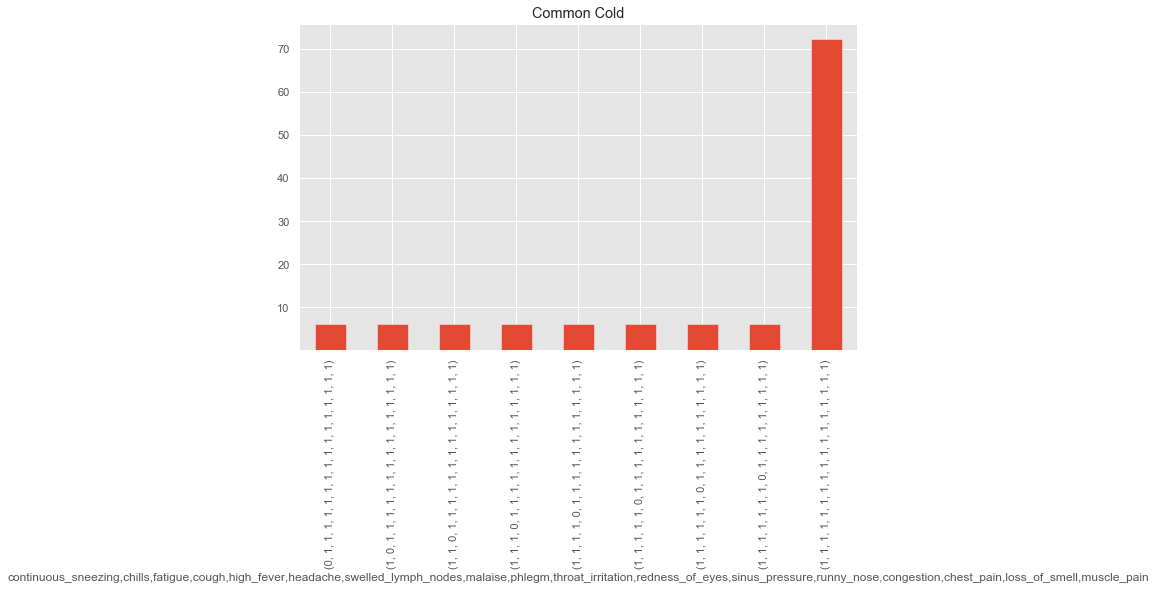

Pneumonia


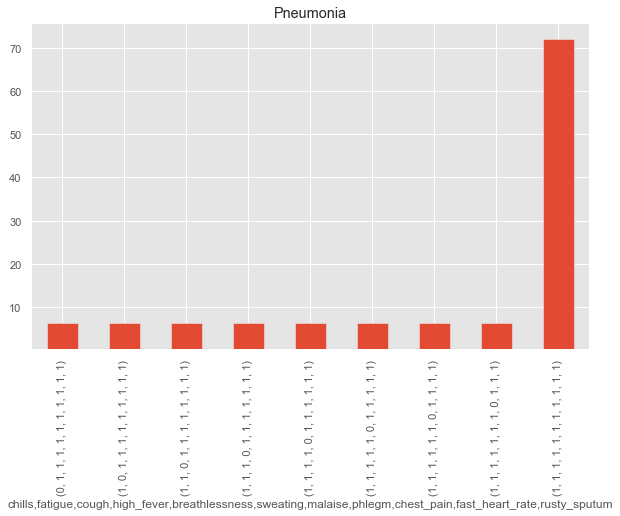

Dimorphic hemmorhoids(piles)


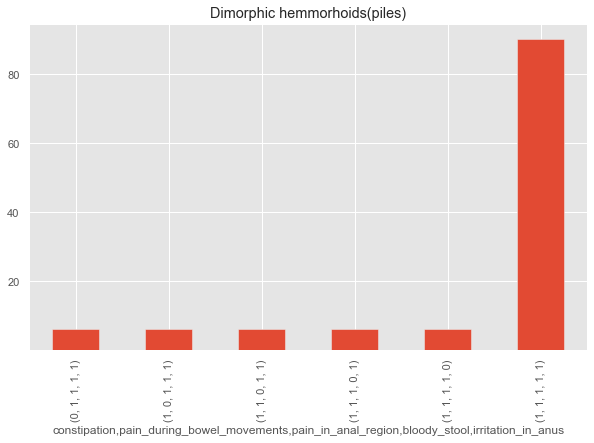

Heart attack


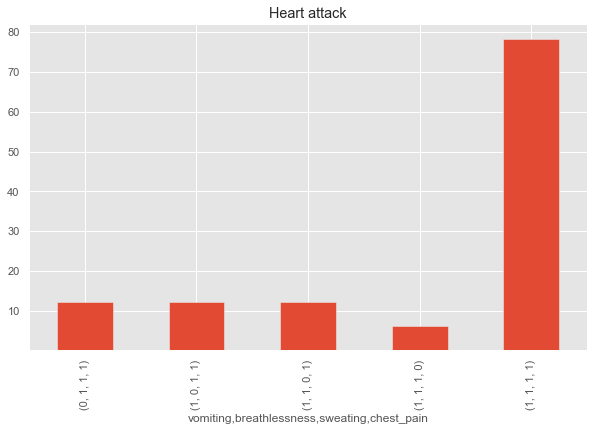

Varicose veins


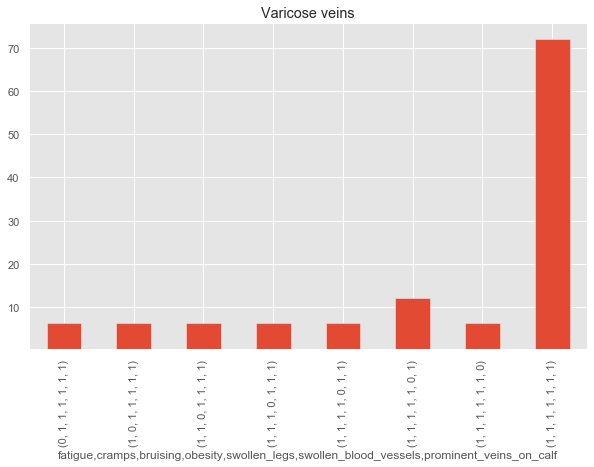

Hypothyroidism


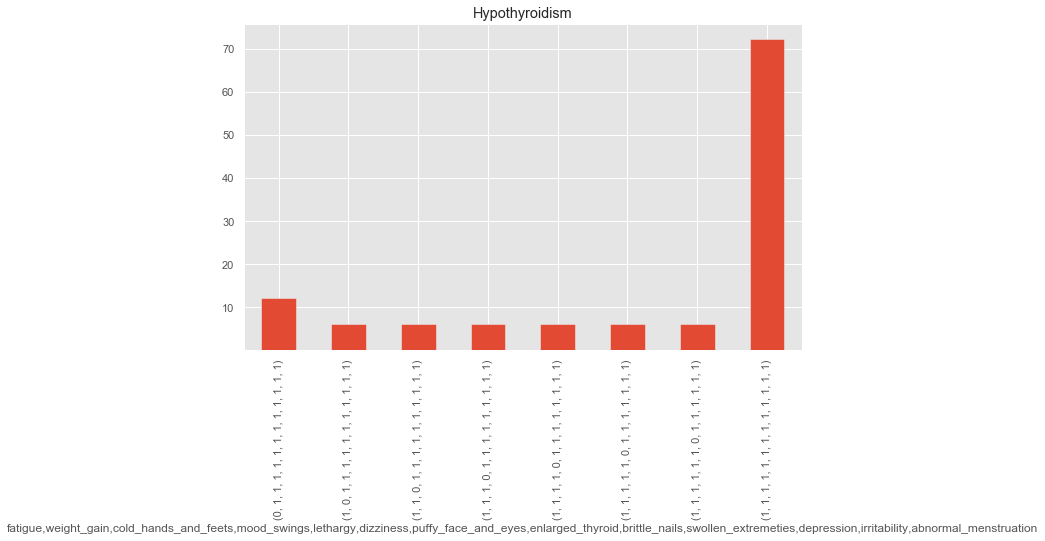

Hyperthyroidism


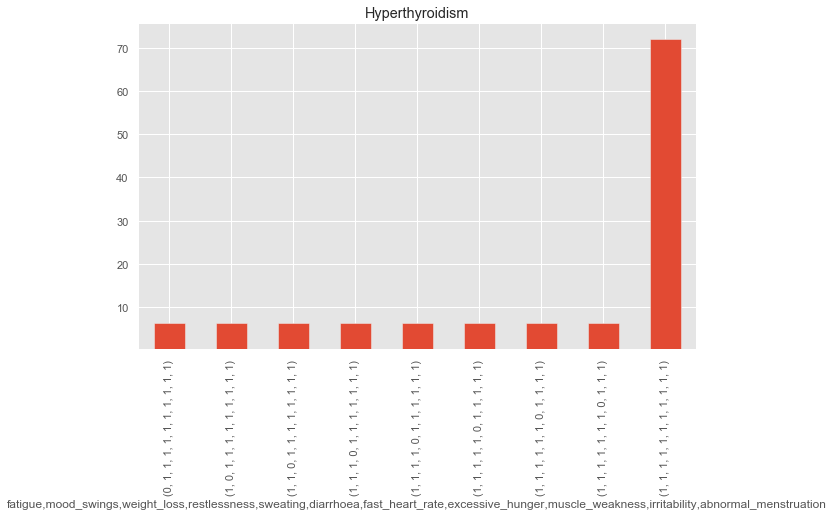

Hypoglycemia


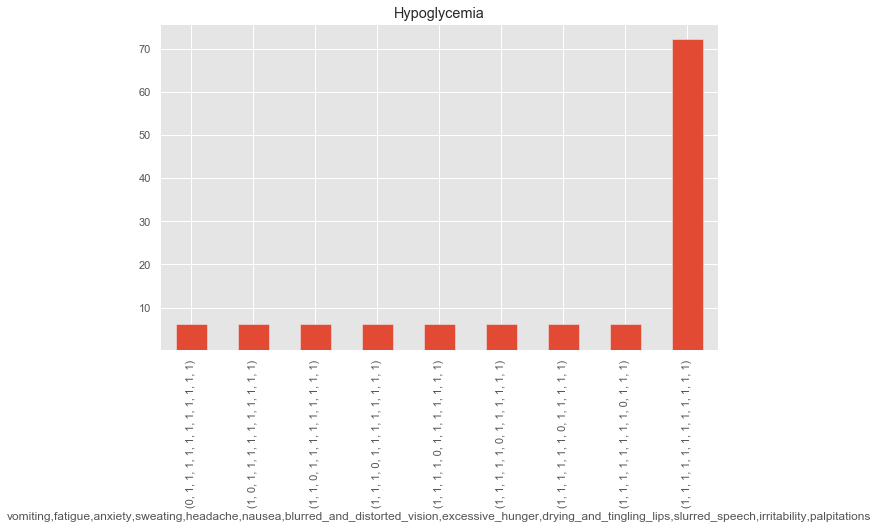

Osteoarthristis


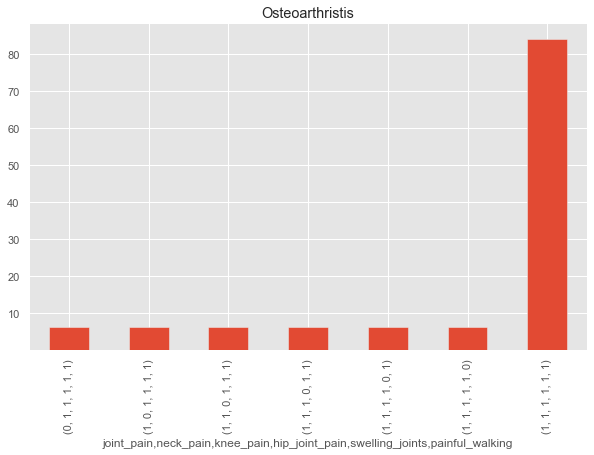

Arthritis


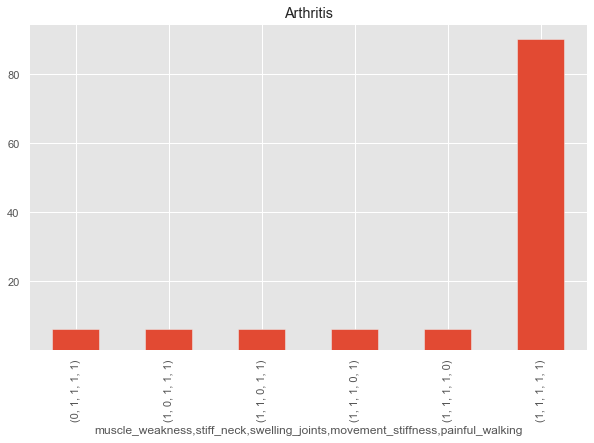

(vertigo) Paroymsal  Positional Vertigo


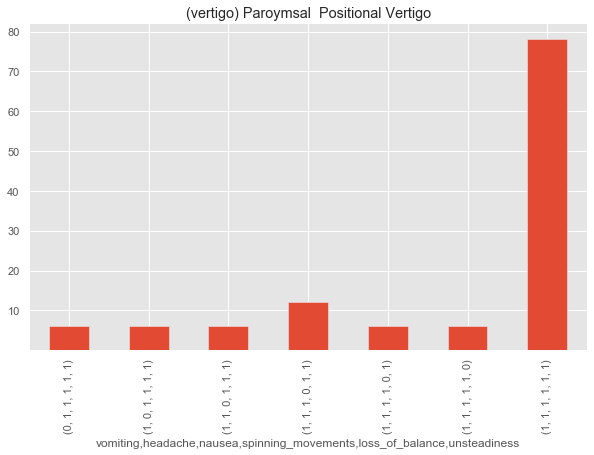

Acne


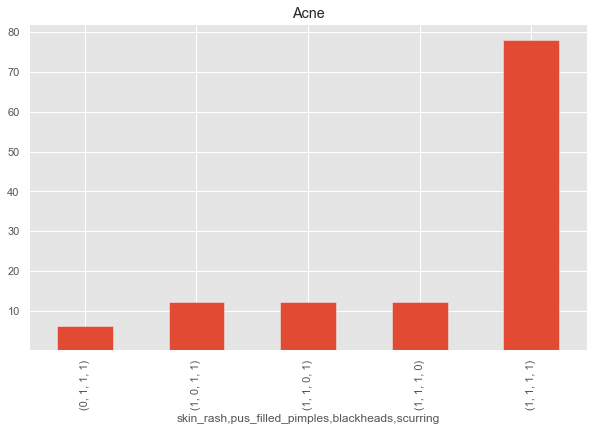

Urinary tract infection


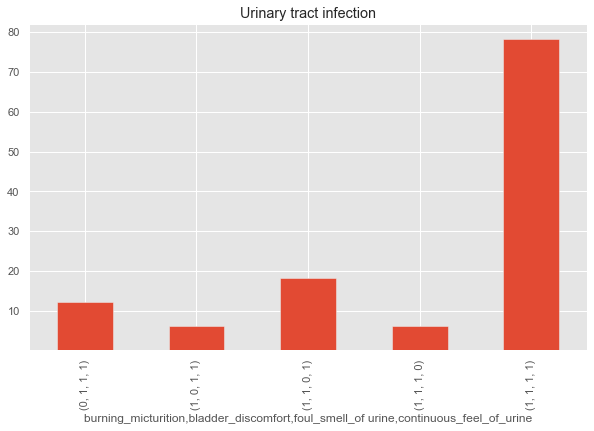

Psoriasis


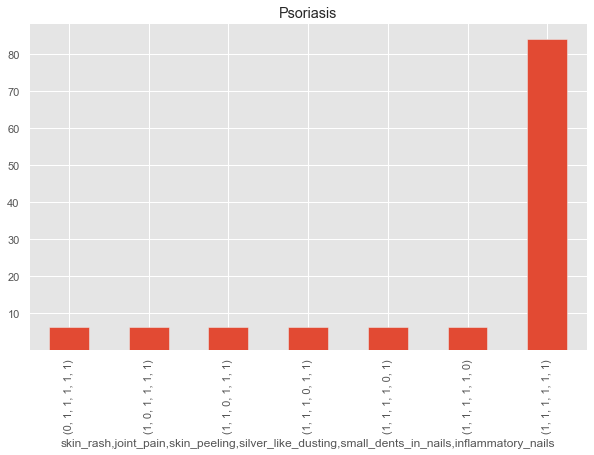

Impetigo


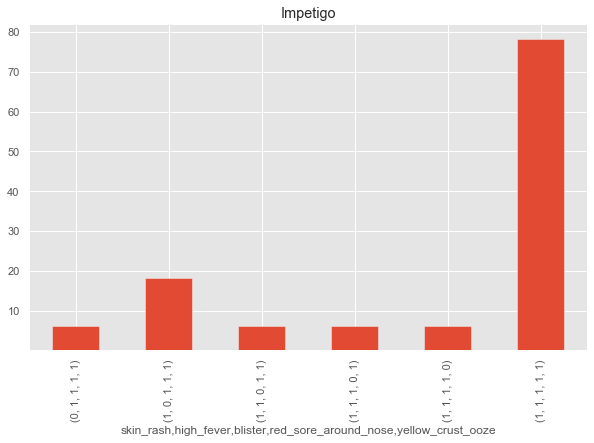

In [125]:
pdf = PdfPages('Prognosis Vs Symtoms.pdf')
for disease in df_train.prognosis.unique():
    if disease != 'prognosis':
        chart = dis_name(disease,df_train)
        pdf.savefig(chart.get_figure())
pdf.close()        

Fungal infection


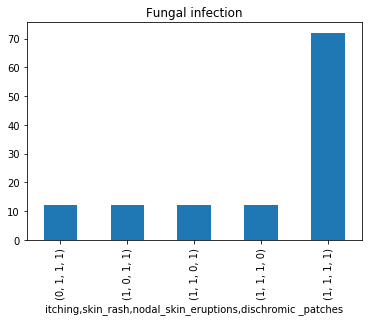

Allergy


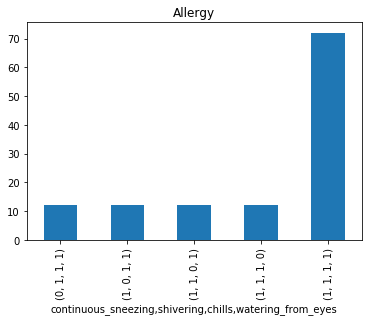

GERD


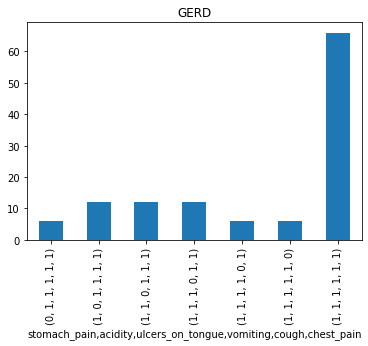

Chronic cholestasis


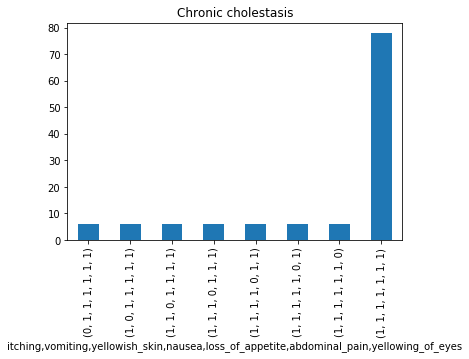

Drug Reaction


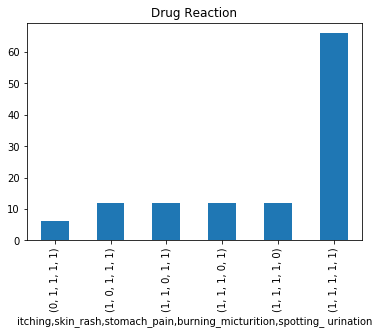

Peptic ulcer diseae


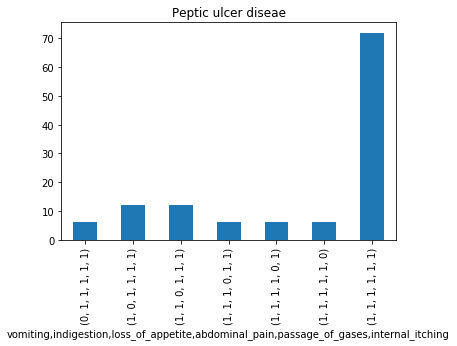

AIDS


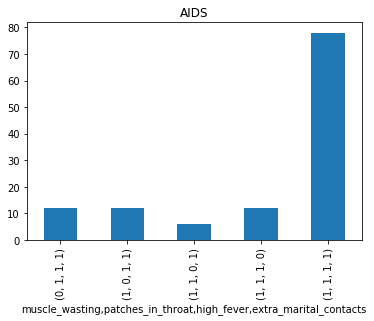

Diabetes 


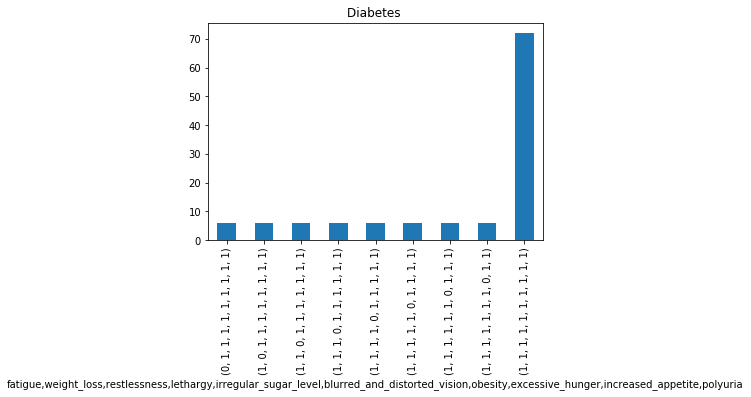

Gastroenteritis


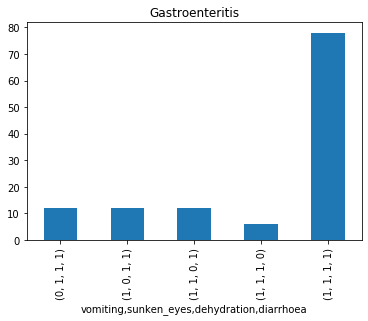

Bronchial Asthma


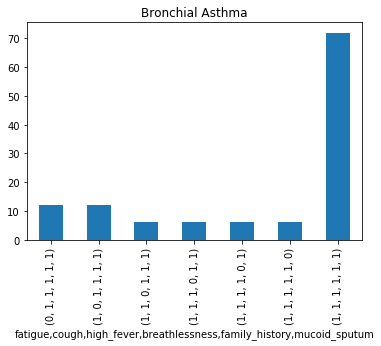

Hypertension 


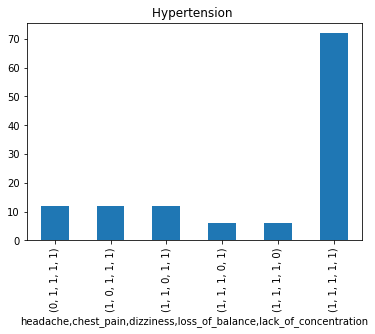

Migraine


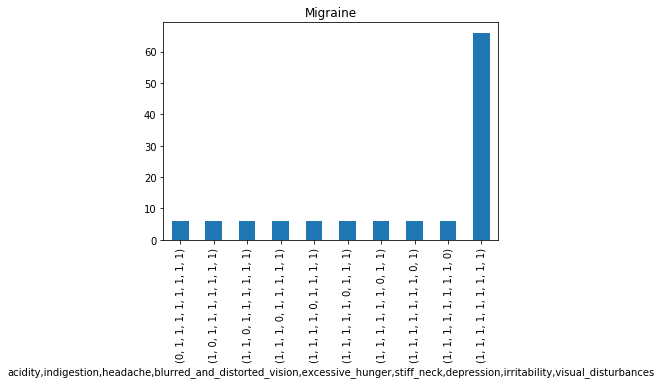

Cervical spondylosis


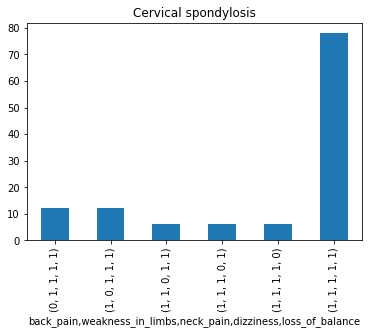

Paralysis (brain hemorrhage)


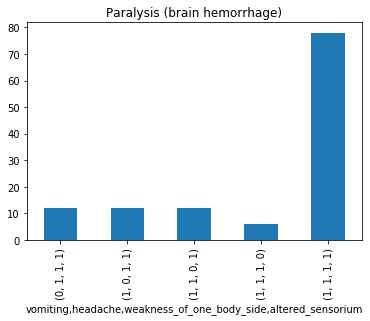

Jaundice


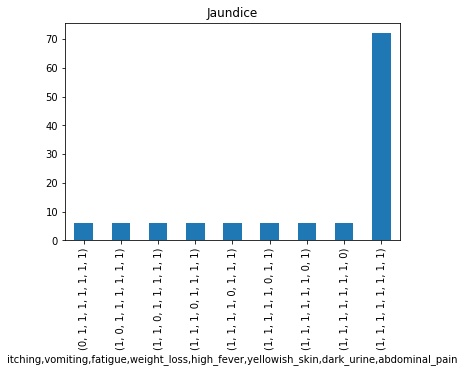

Malaria


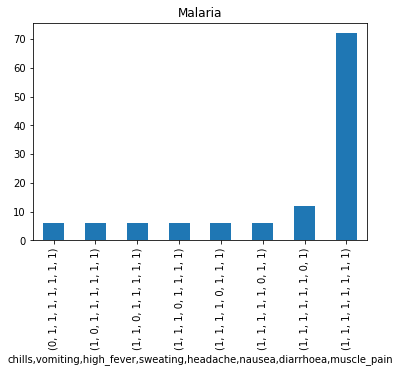

Chicken pox


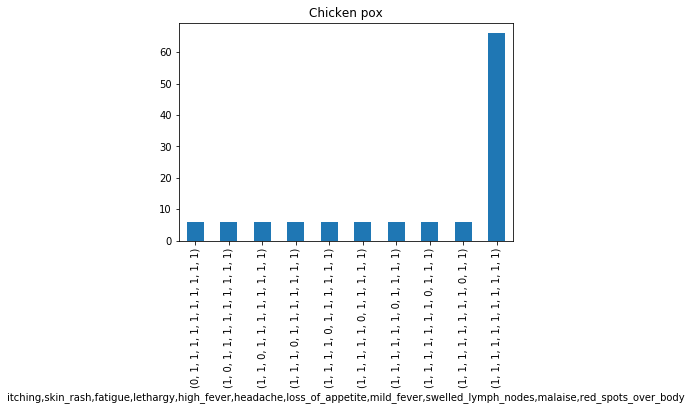

Dengue


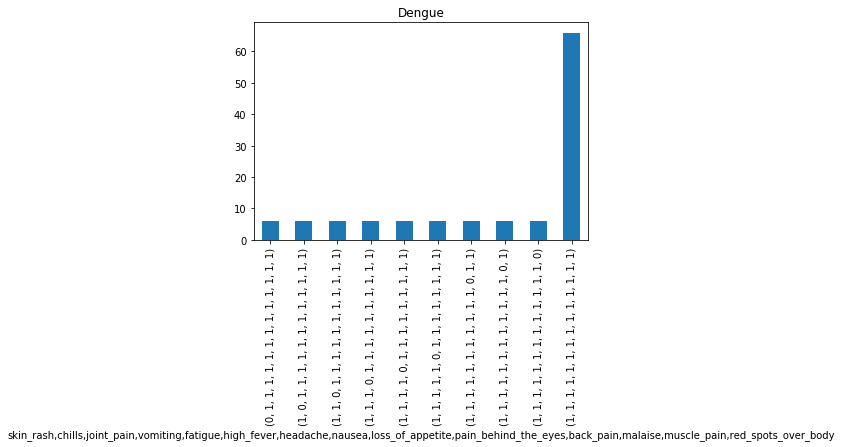

Typhoid


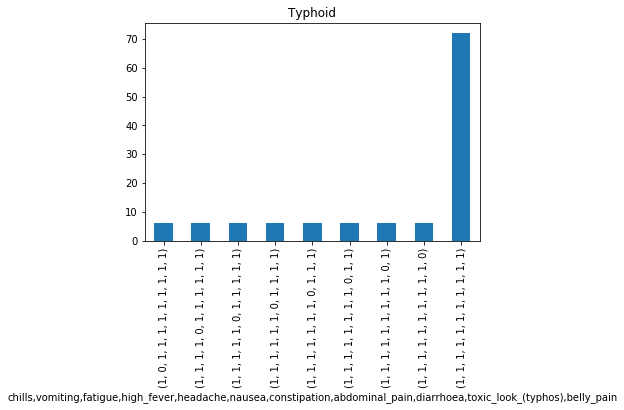

hepatitis A


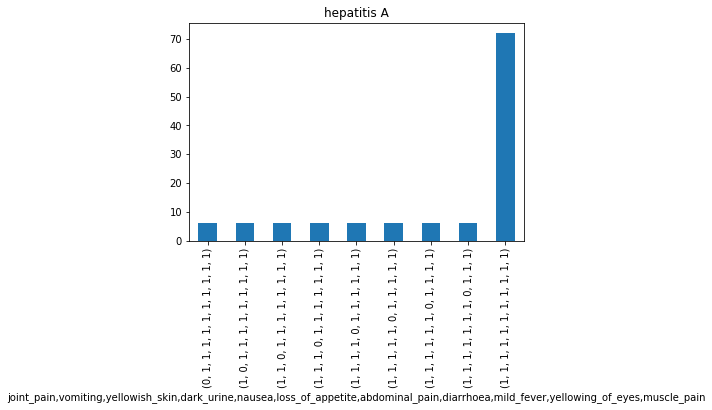

Hepatitis B


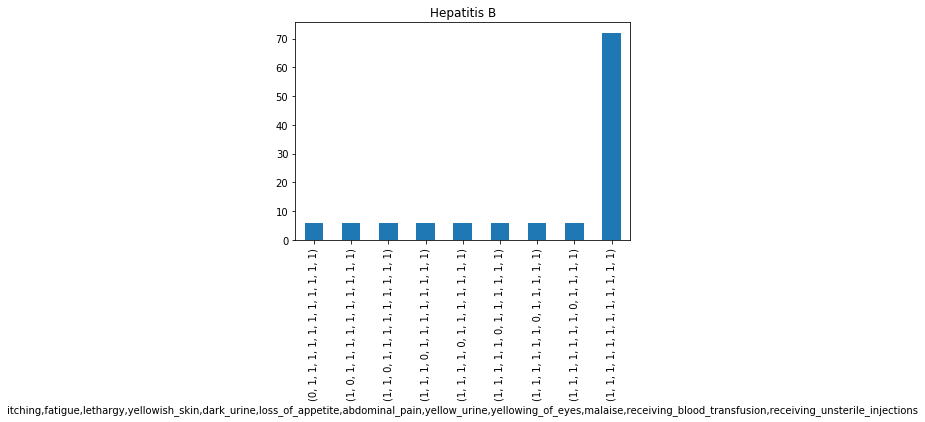

Hepatitis C


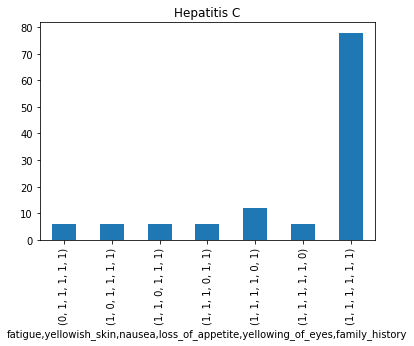

Hepatitis D


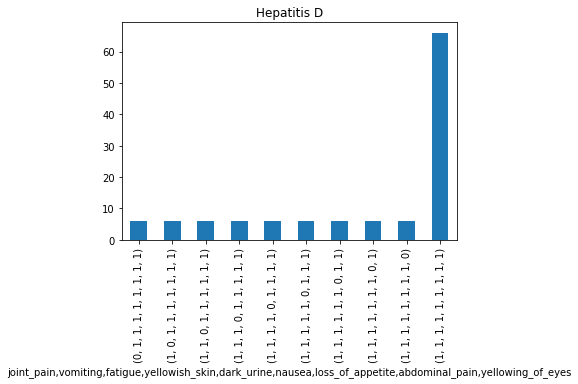

Hepatitis E


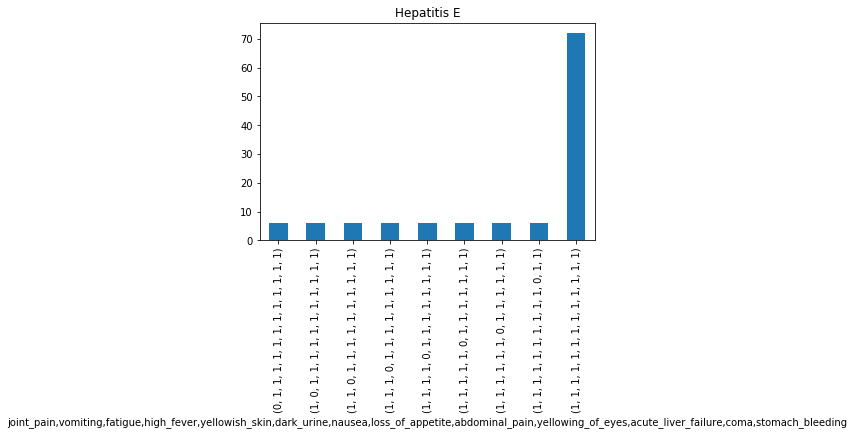

Alcoholic hepatitis


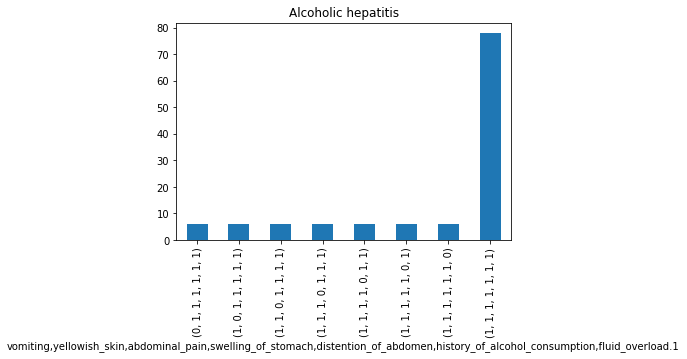

Tuberculosis


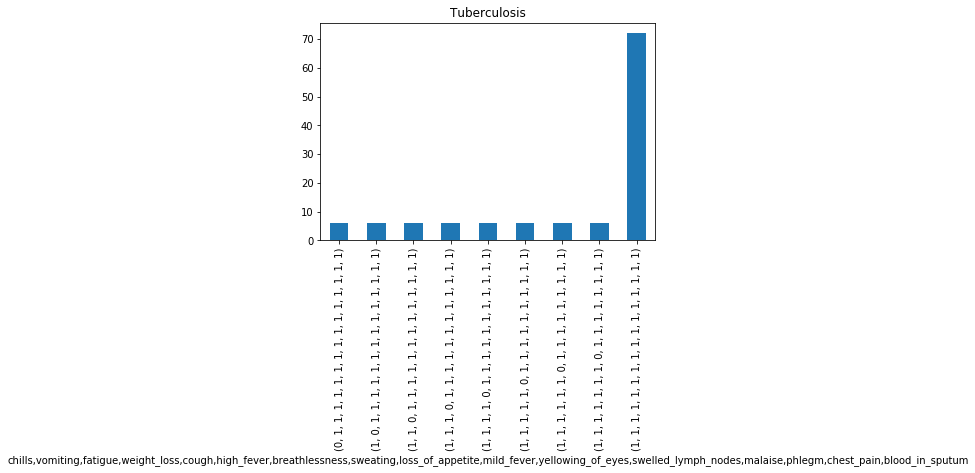

Common Cold


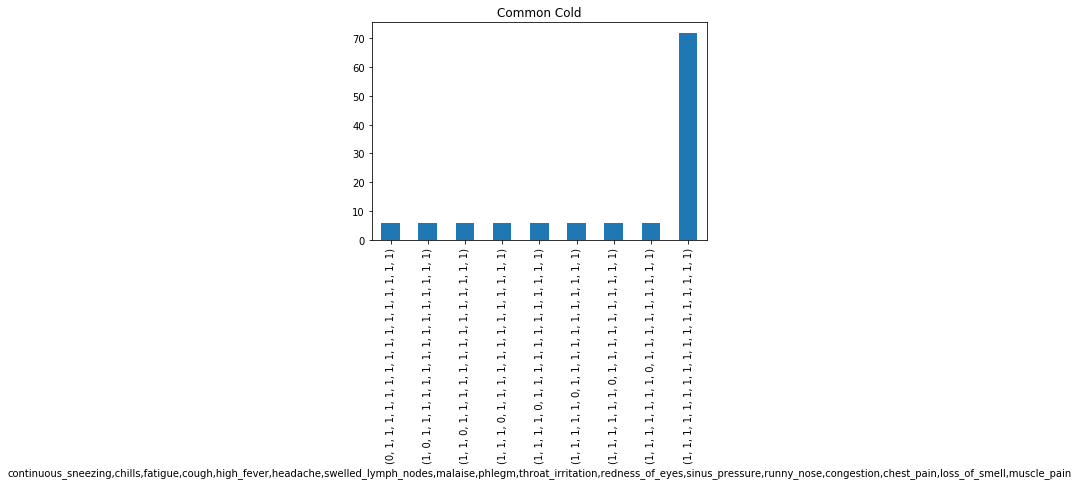

Pneumonia


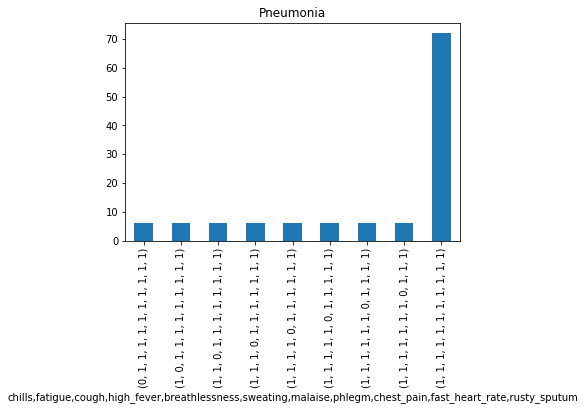

Dimorphic hemmorhoids(piles)


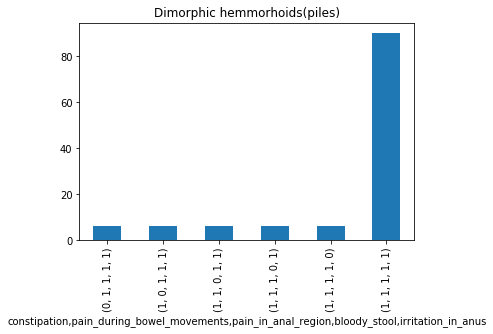

Heart attack


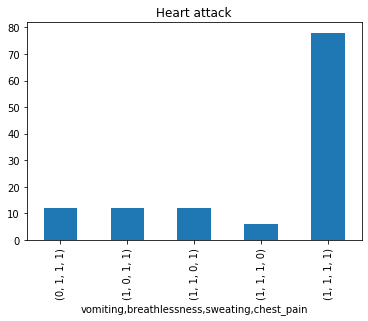

Varicose veins


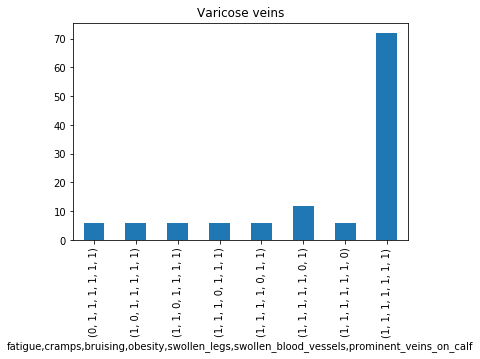

Hypothyroidism


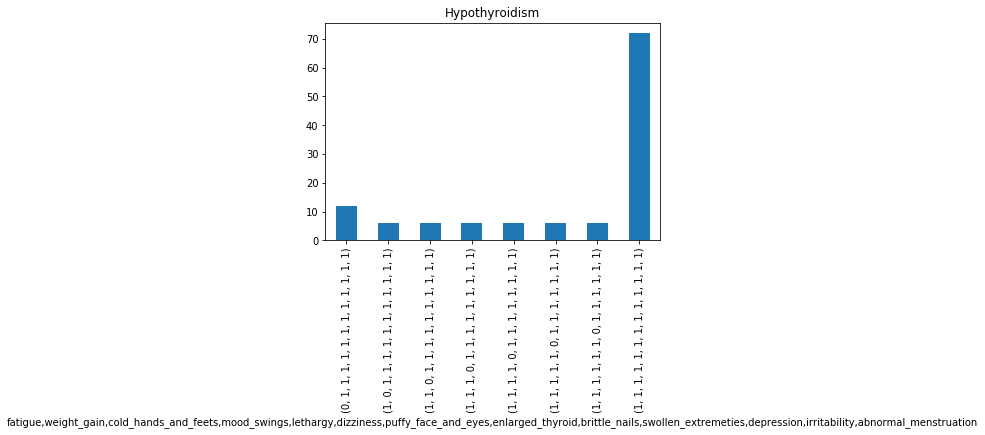

Hyperthyroidism


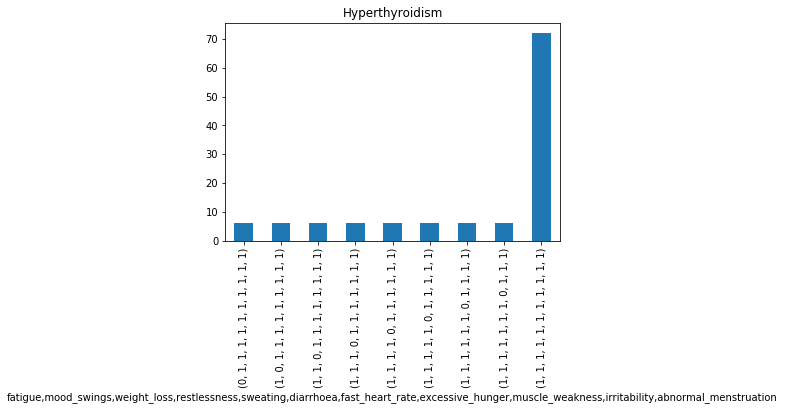

Hypoglycemia


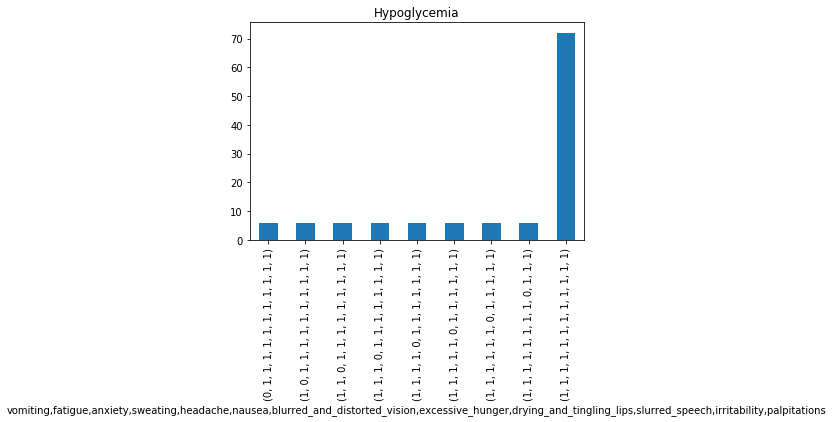

Osteoarthristis


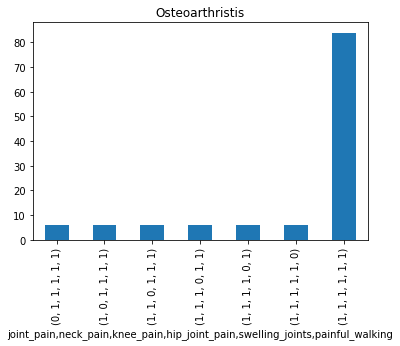

Arthritis


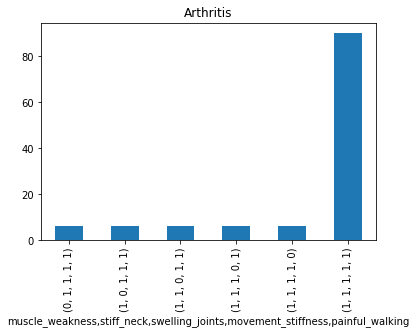

(vertigo) Paroymsal  Positional Vertigo


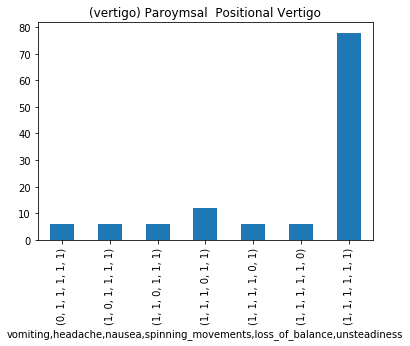

Acne


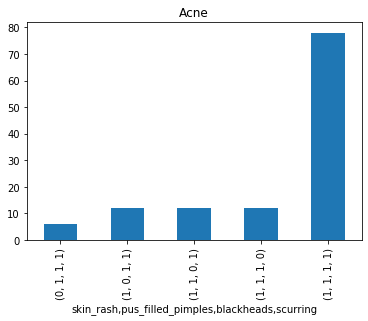

Urinary tract infection


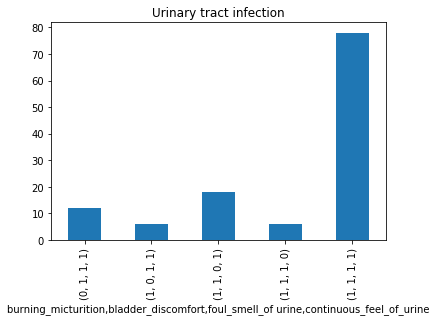

Psoriasis


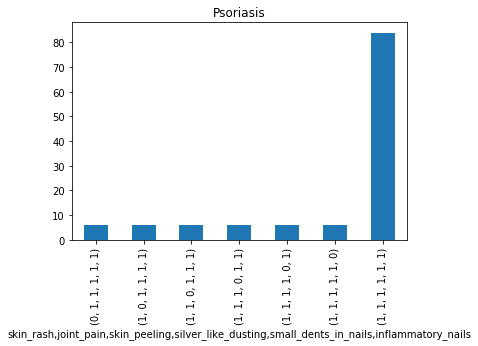

Impetigo


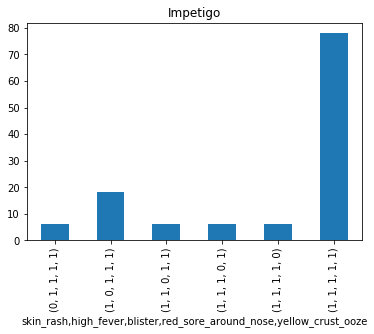

SyntaxError: 'return' outside function (<ipython-input-23-11cb9f908f66>, line 5)

<Figure size 432x288 with 0 Axes>

In [23]:
Disease= []
for disease in df_train.prognosis.unique():
    dis_name(disease,df_train)
    plt.savefig('/Users/ayadav/Downloads/plot.png', dpi=300, bbox_inches='tight')
return Disease

In [ ]:
# Retrive particular disease and columns show symtoms for that particular disease
# Retrieve all records for given input disease and then removes columns which are not its symptoms.
def dis_name(disease_name,df):
    print(disease)
    # Retrieve all rows for given disease
    df_disease =df.loc[df['prognosis'] == disease_name]
    
    # Remove columns with no symptoms for current disease  
    for column in df_disease:
        if (df_disease.loc[df_disease[column] == 1].size == 0):
            del df_disease[column] 
            
    df_gb = df_disease.groupby(list(df_disease.columns.values)).size()
    df_gb.plot(kind = 'pie')
    plt.show()
    return

In [ ]:
plt.savefig("/Users/ayadav/Downloads/Disease.png")

In [ ]:
 for disease in df_train.prognosis.unique():
    dis_name(disease,df_train)

In [24]:
sns.set(style= 'whitegrid', palette='pastel', color_codes=True) 
sns.mpl.rc('figure', figsize=(10,6))

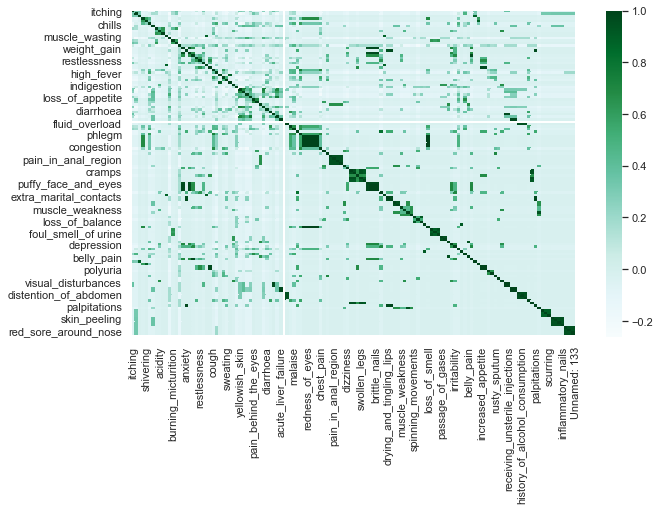

In [25]:
sns.heatmap(df_train.corr(), cmap='BuGn')

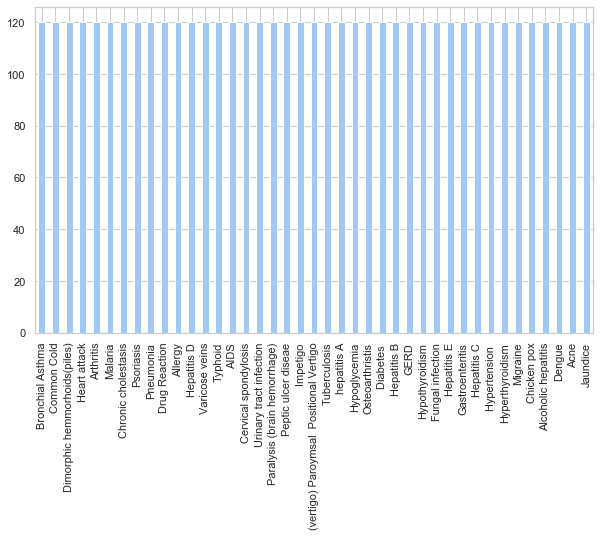

In [26]:
target = df_train['prognosis']
target.value_counts().plot.bar()

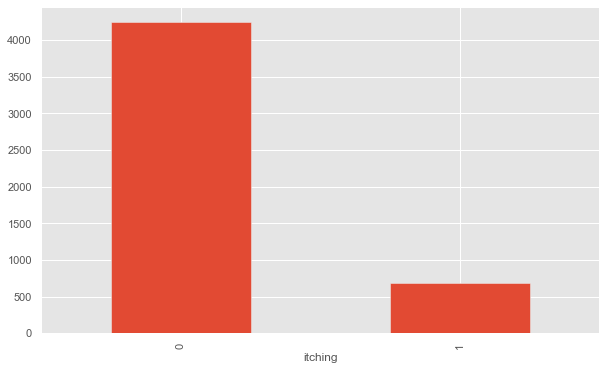

In [27]:
import pandas as pd
import matplotlib
matplotlib.style.use('ggplot')
df_gb = df_train.groupby("itching").size()
df_gb.plot(kind = 'bar')

In [59]:
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
from pdb import set_trace as st
import numpy as np

In [74]:
def visualize_symptom(symptom_name):
    ##with PdfPages('foo.pdf') as pdf:
        df_itching = df_train[['prognosis',symptom_name]]
        df_itching= df_itching[df_itching[symptom_name]== 1]
        df_gb = df_itching.groupby('prognosis').size()
        pie=df_gb.plot(kind = 'pie', title= symptom_name,autopct='%1.1f%%') 
        plt.axes().set_ylabel('Prognosis')
       
        plt.show()
        
        return pie

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


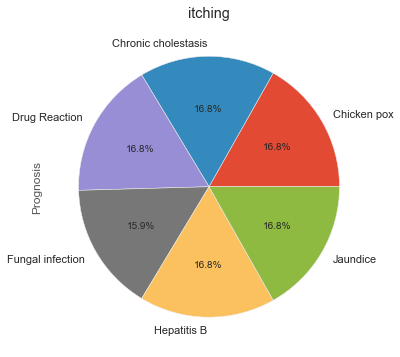

In [75]:
visualize_symptom('itching')
#plt.savefig("foo.png", bbox_inches='tight')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


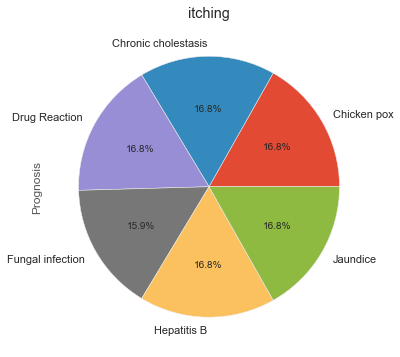

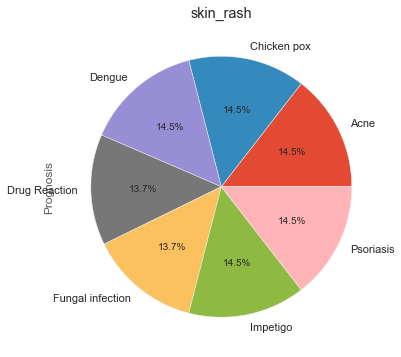

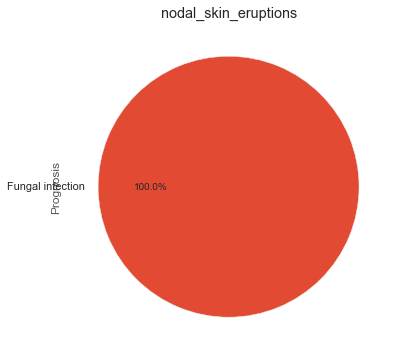

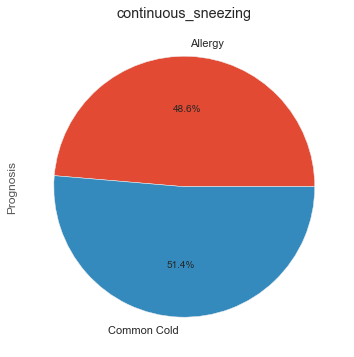

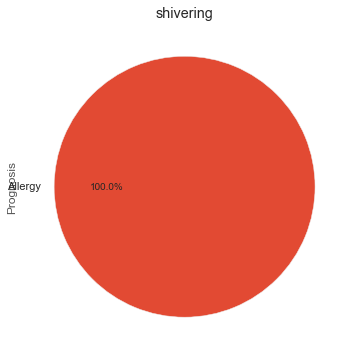

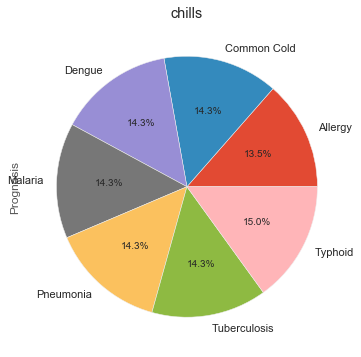

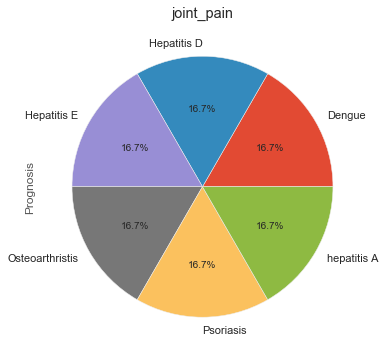

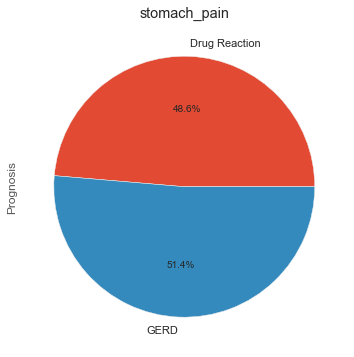

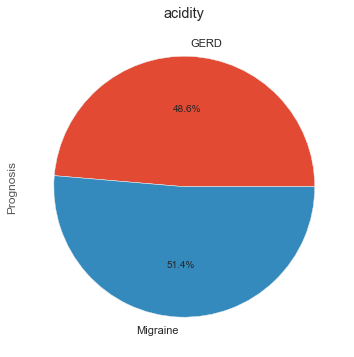

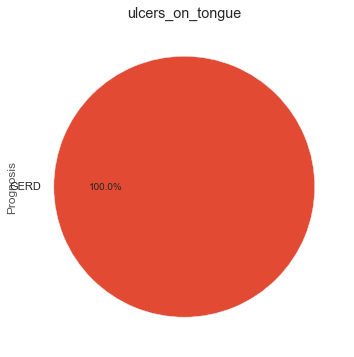

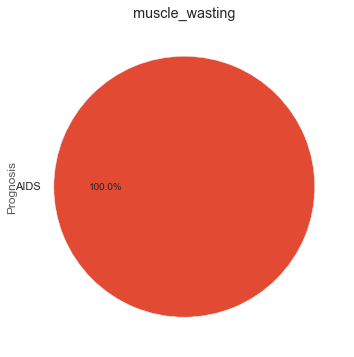

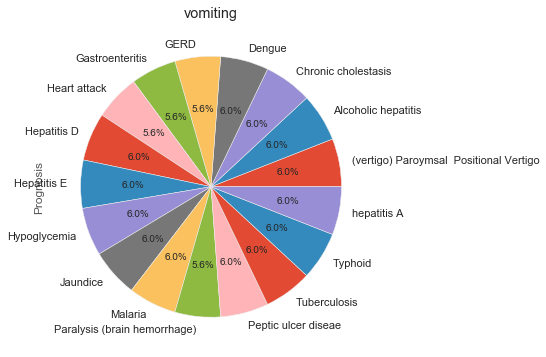

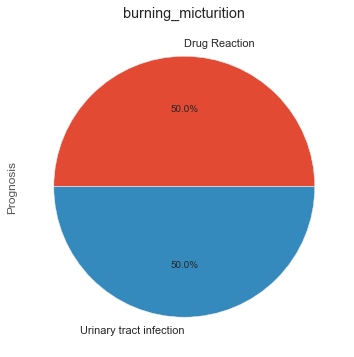

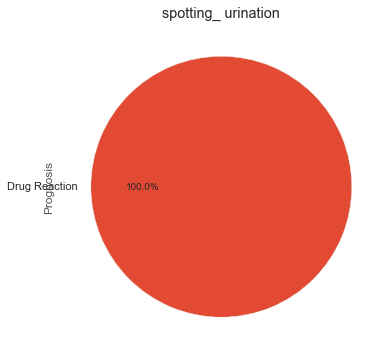

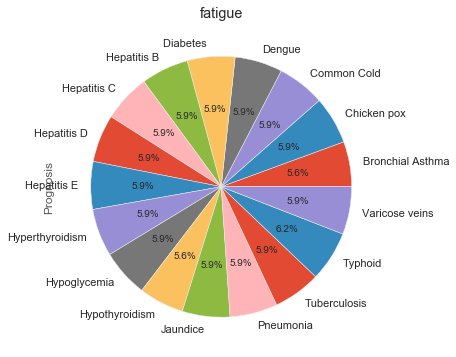

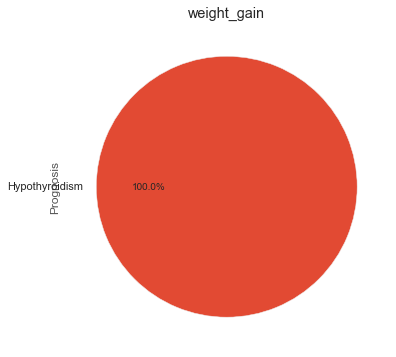

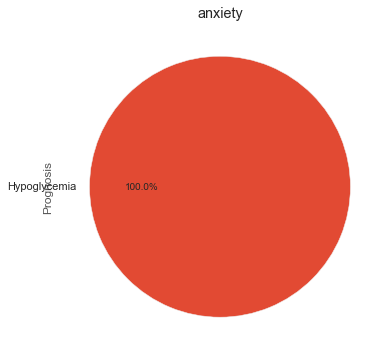

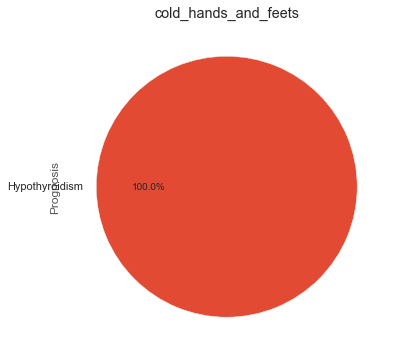

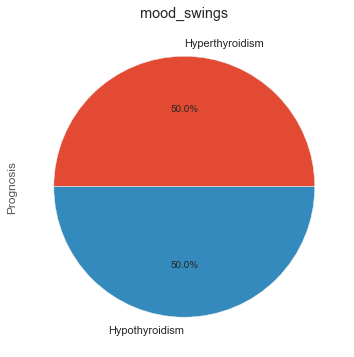

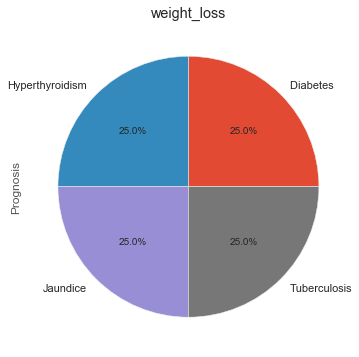

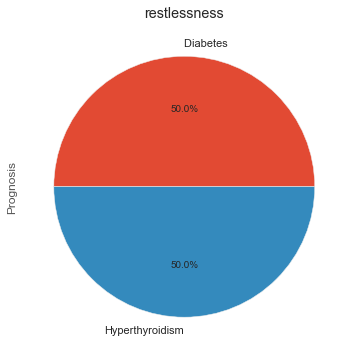

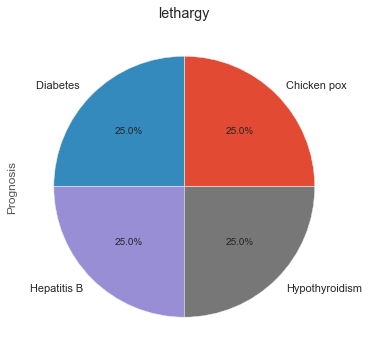

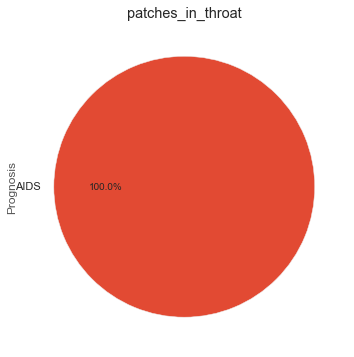

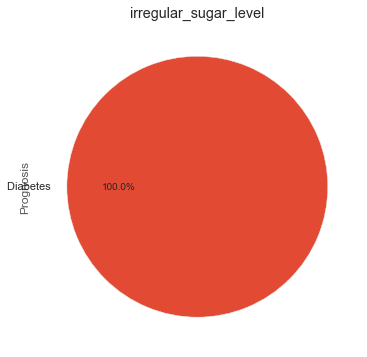

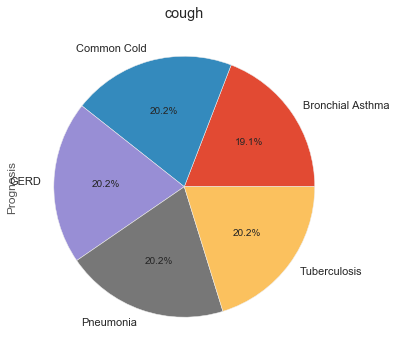

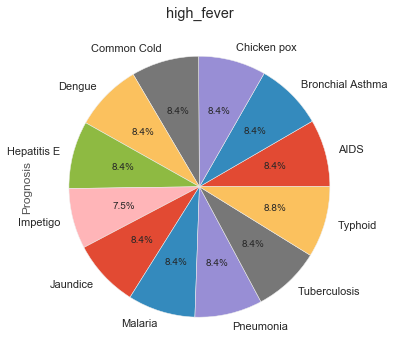

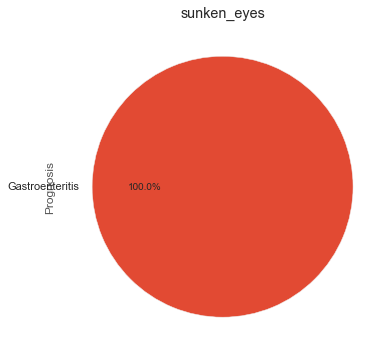

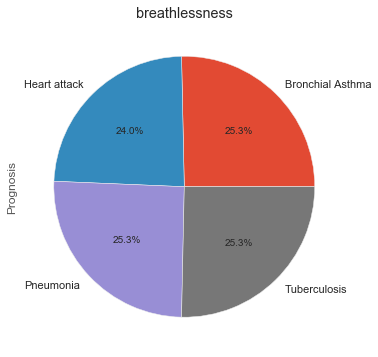

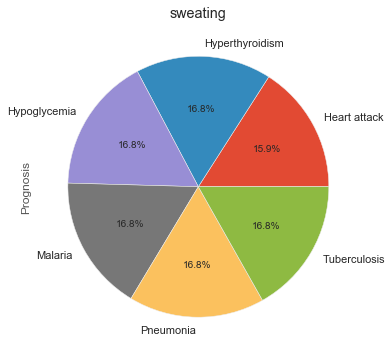

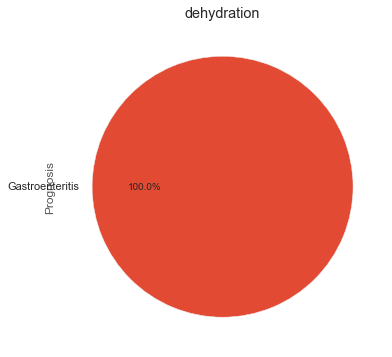

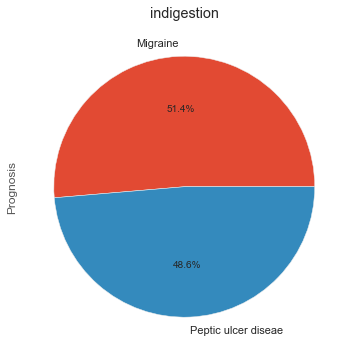

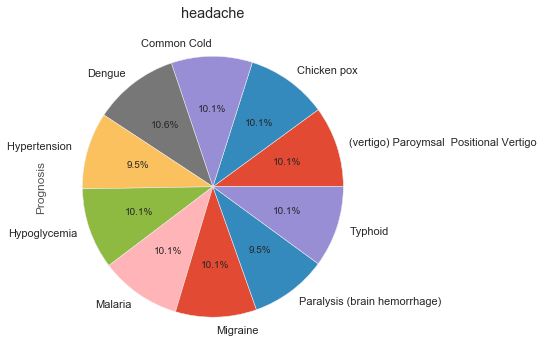

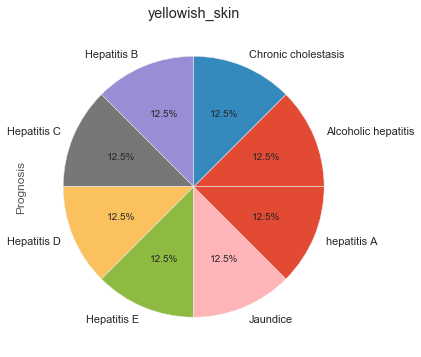

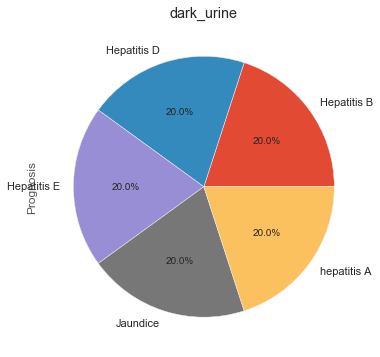

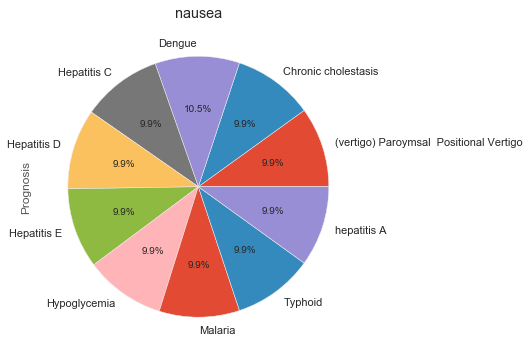

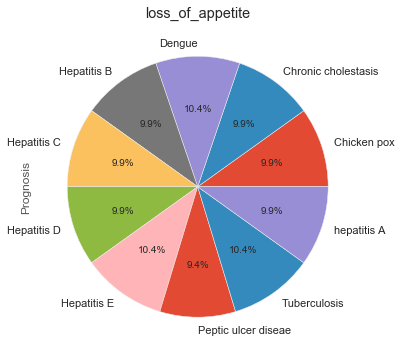

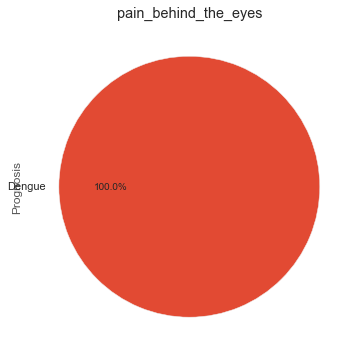

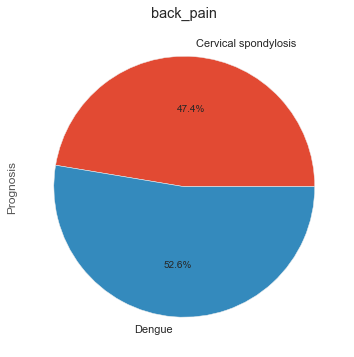

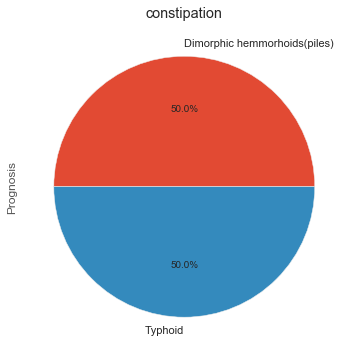

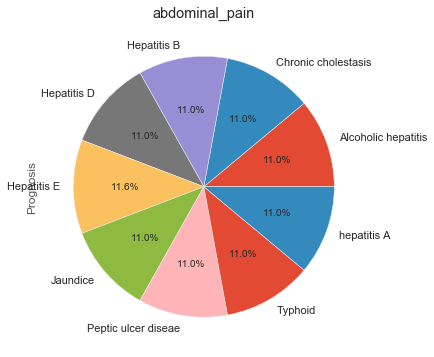

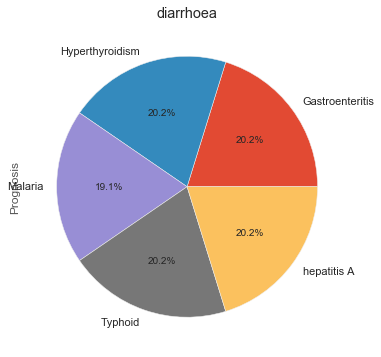

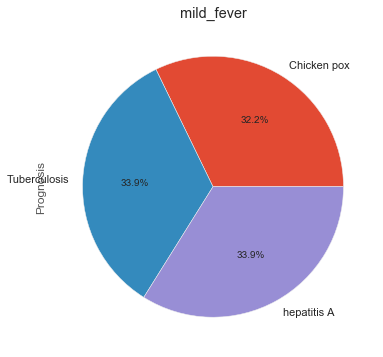

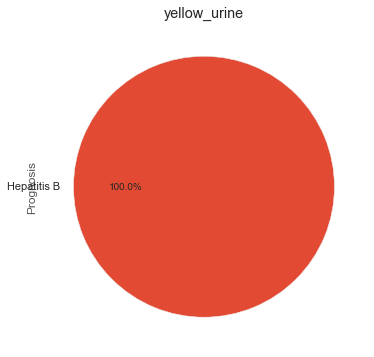

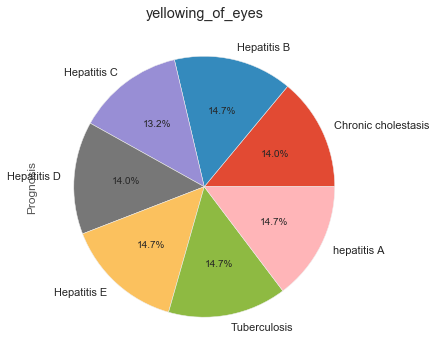

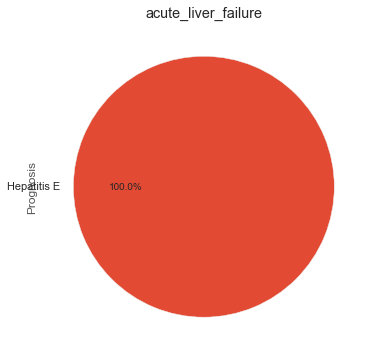

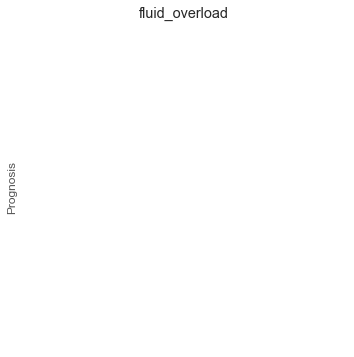

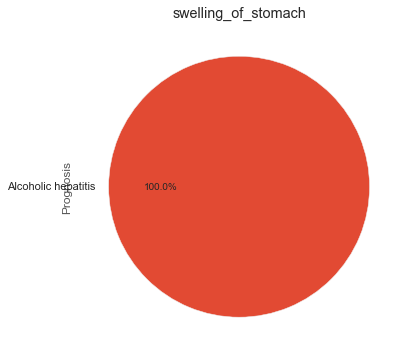

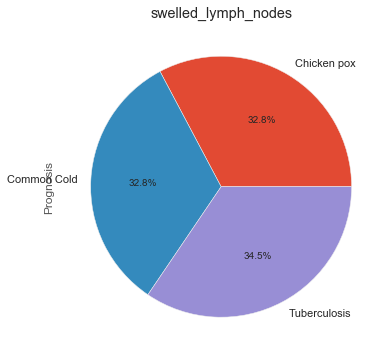

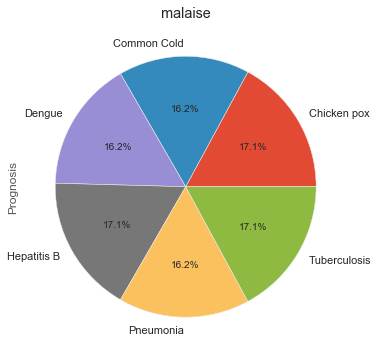

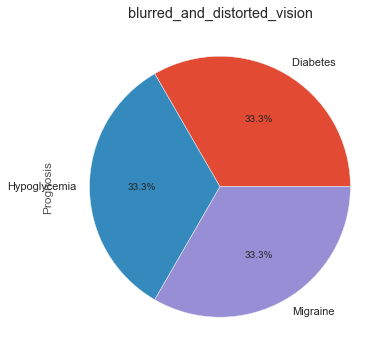

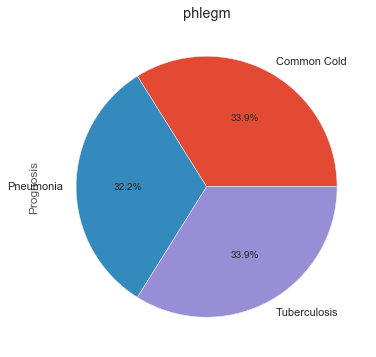

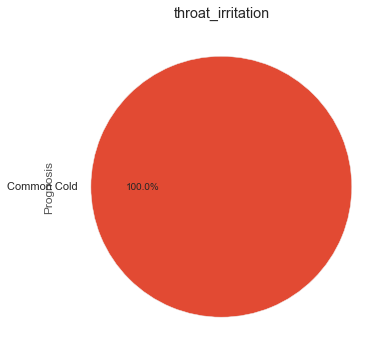

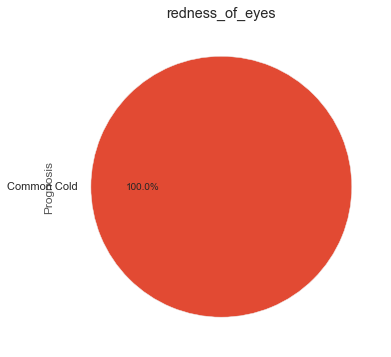

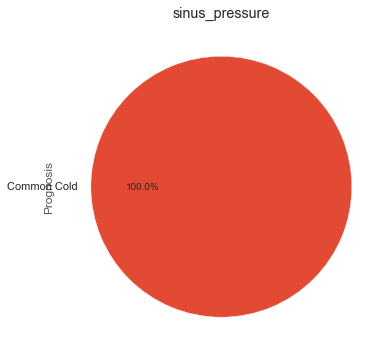

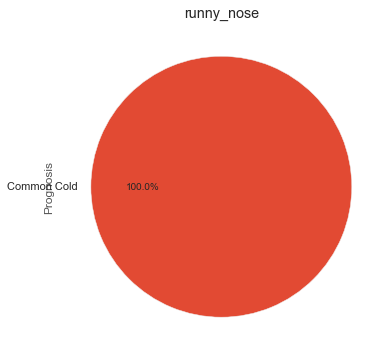

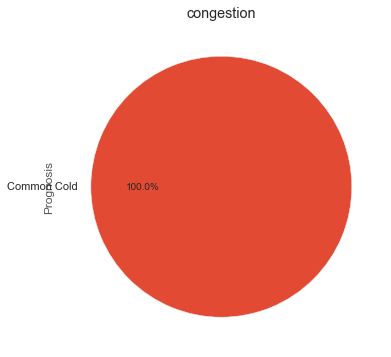

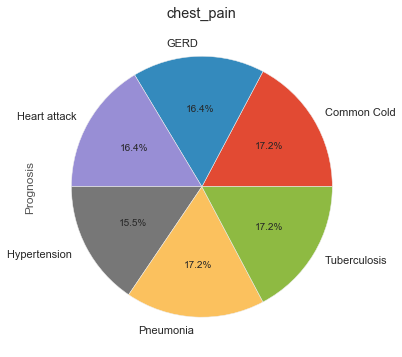

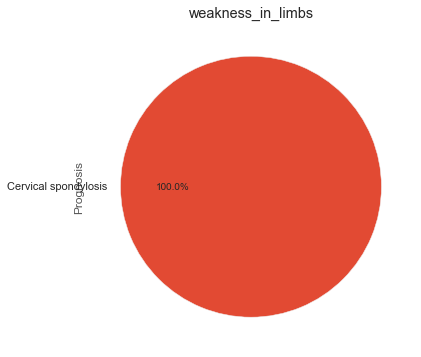

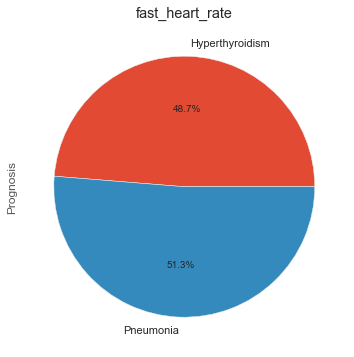

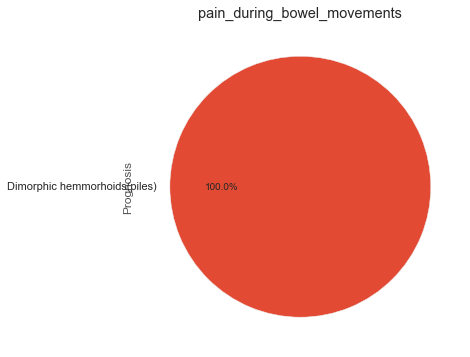

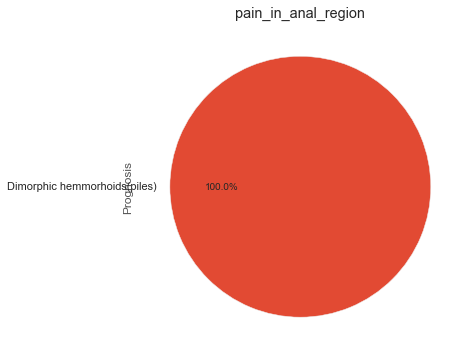

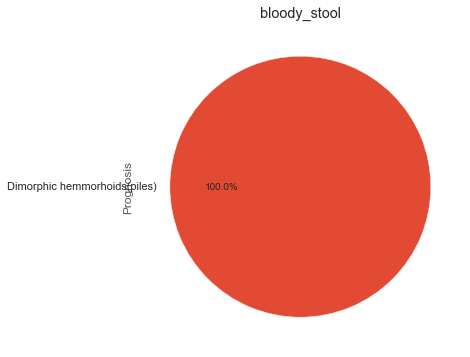

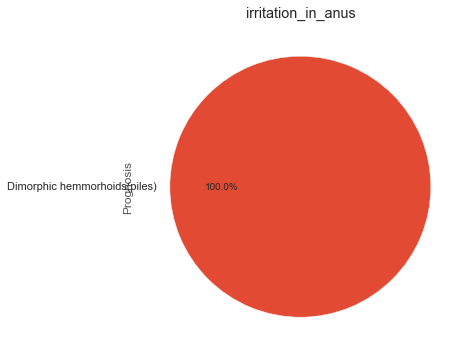

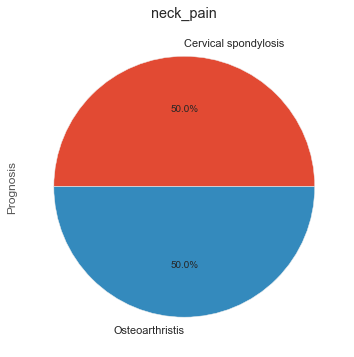

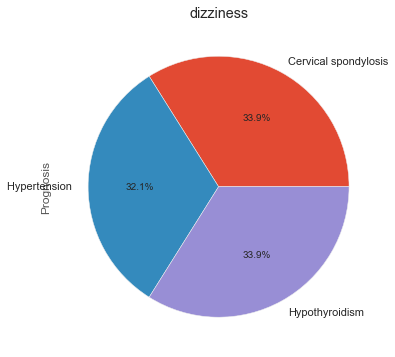

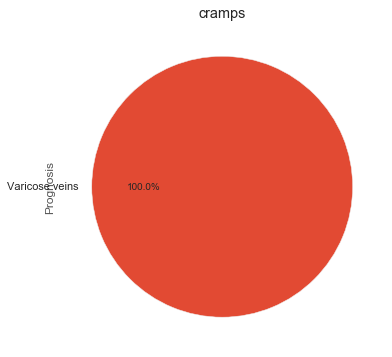

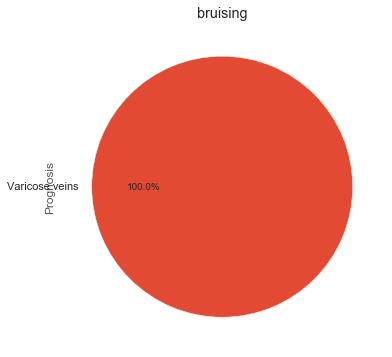

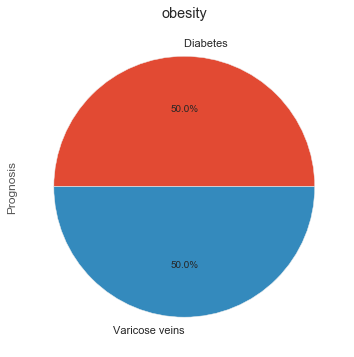

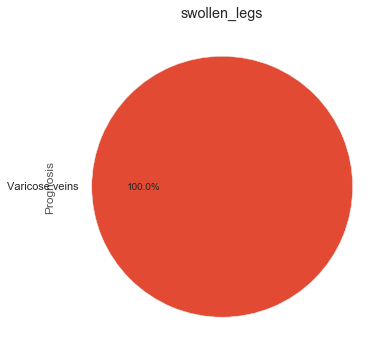

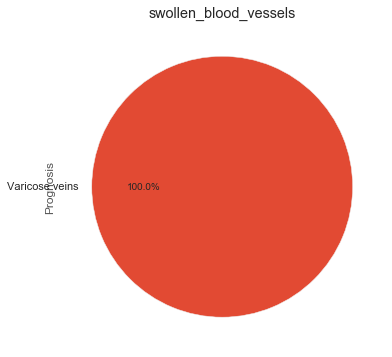

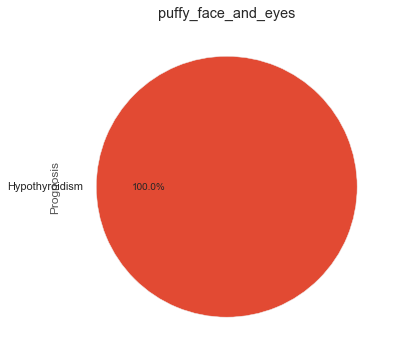

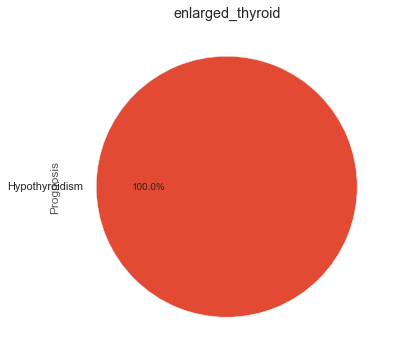

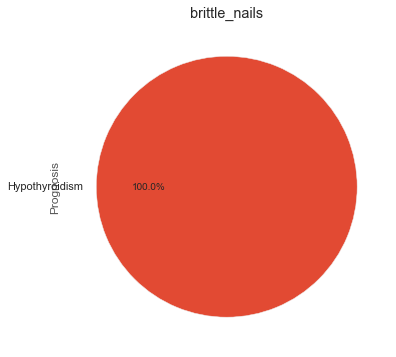

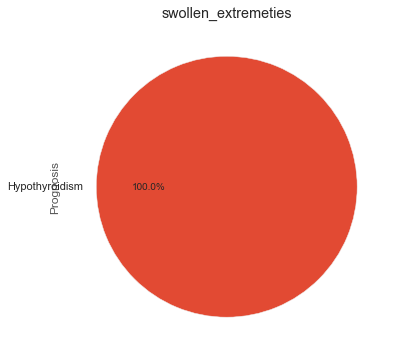

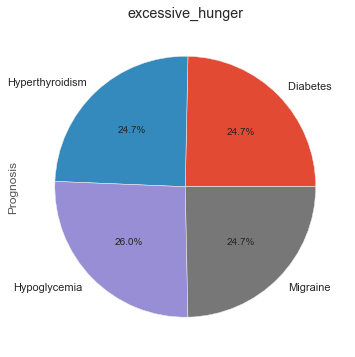

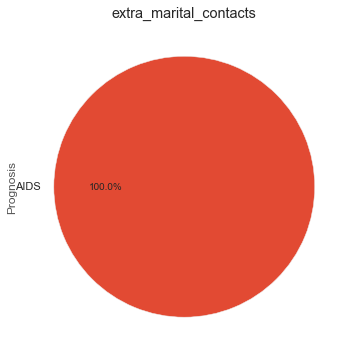

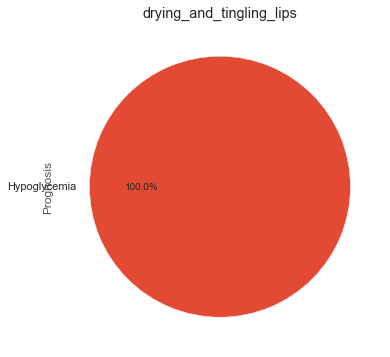

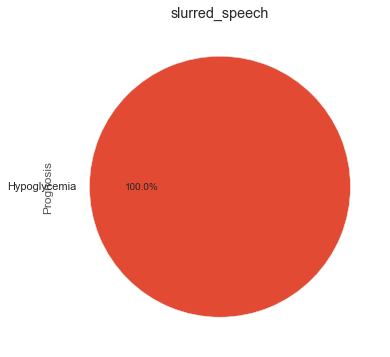

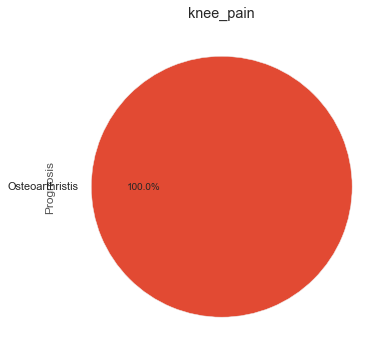

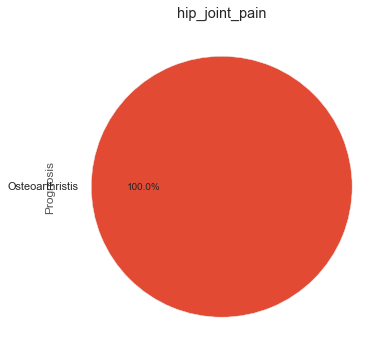

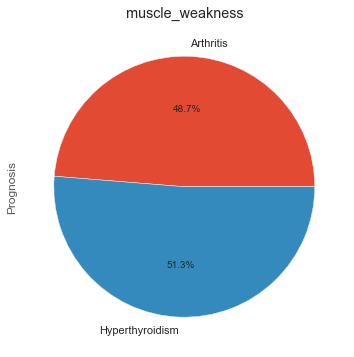

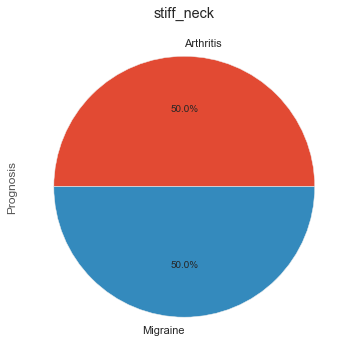

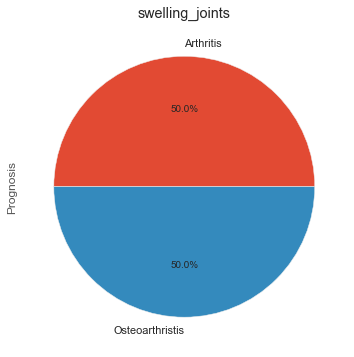

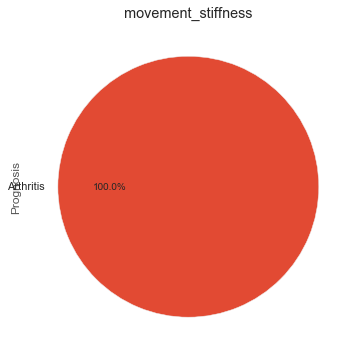

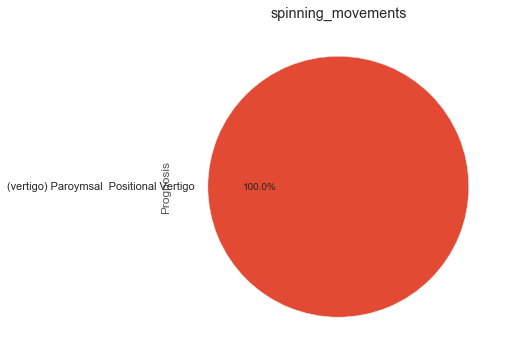

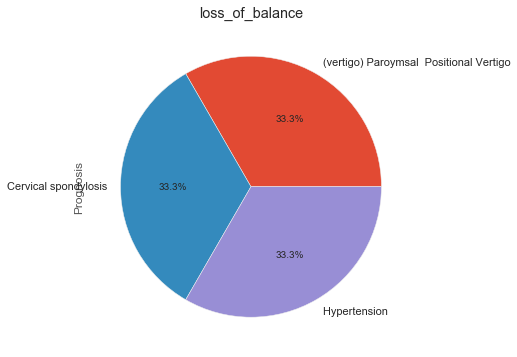

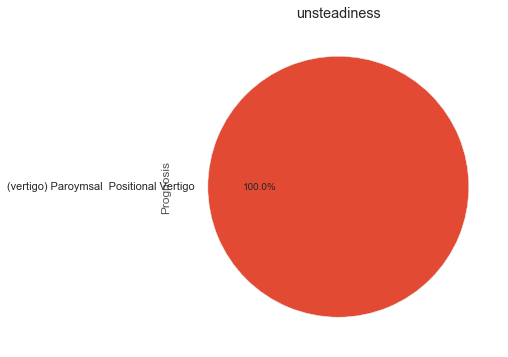

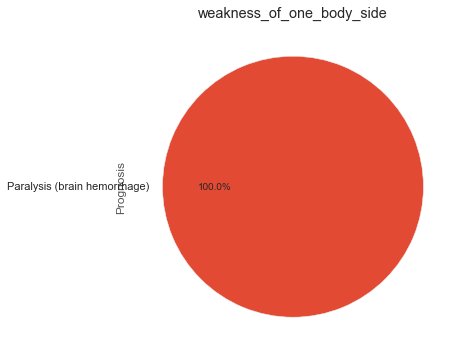

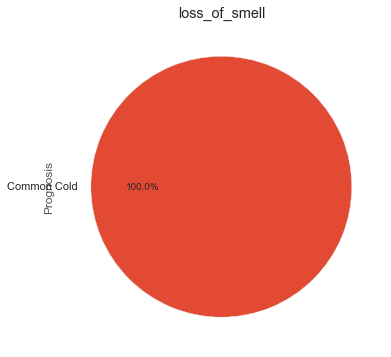

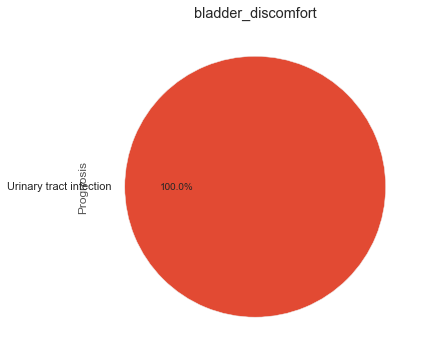

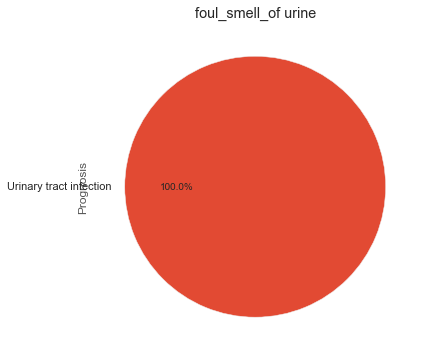

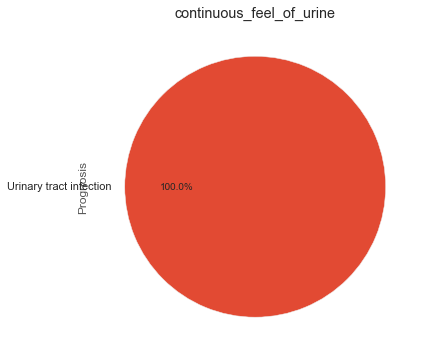

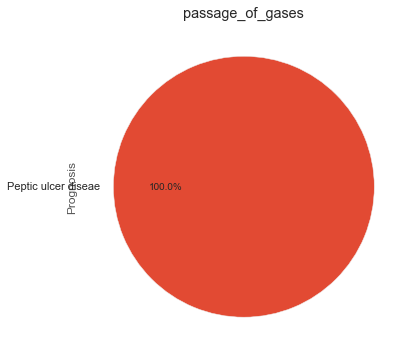

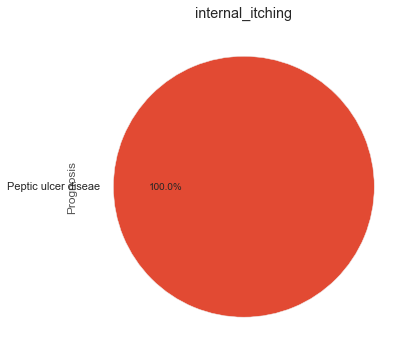

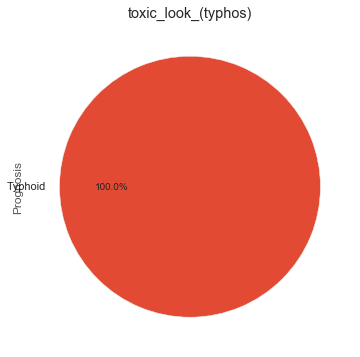

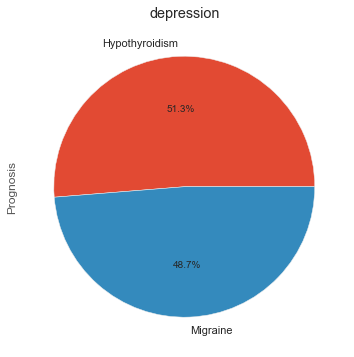

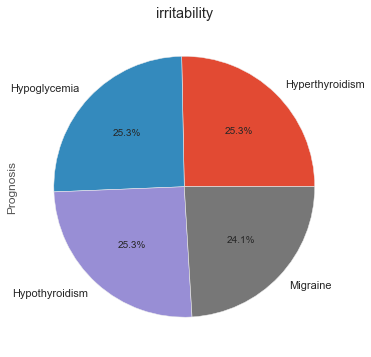

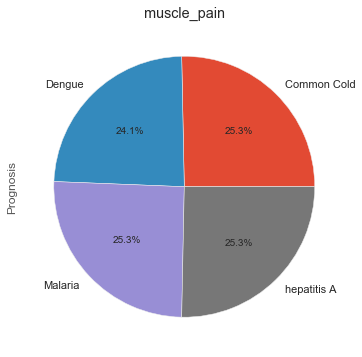

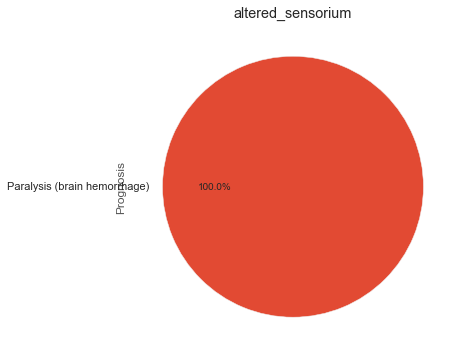

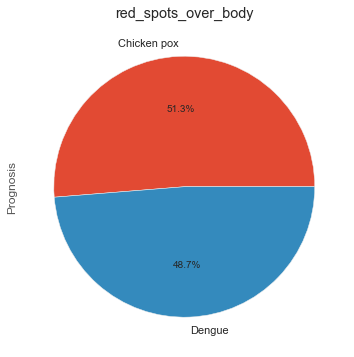

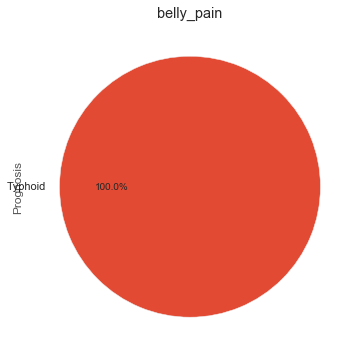

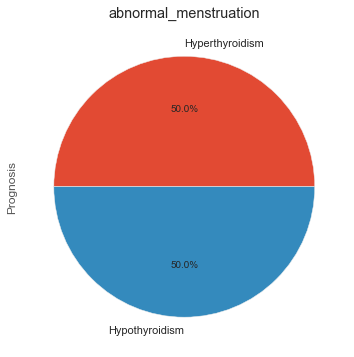

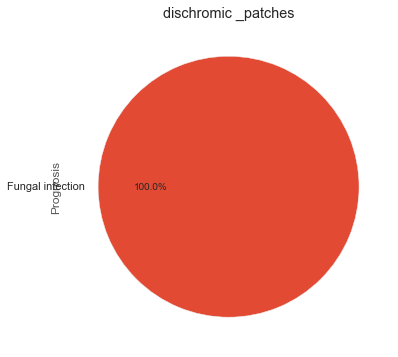

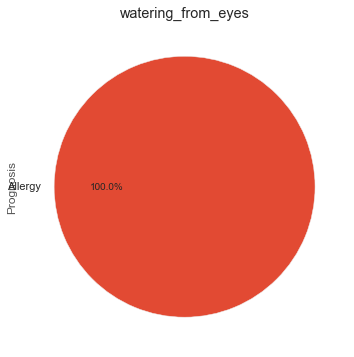

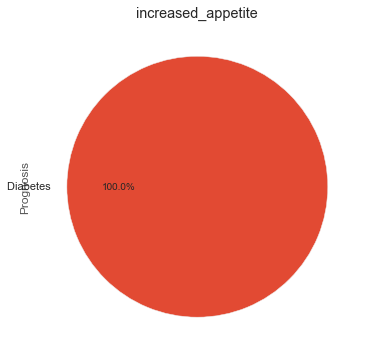

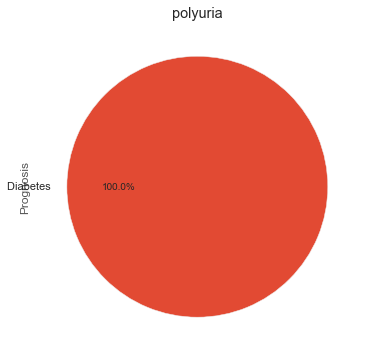

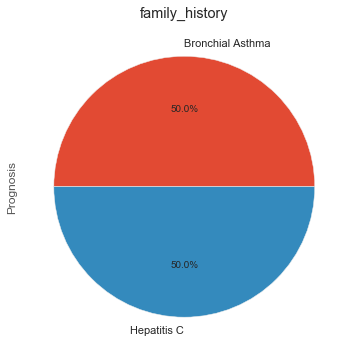

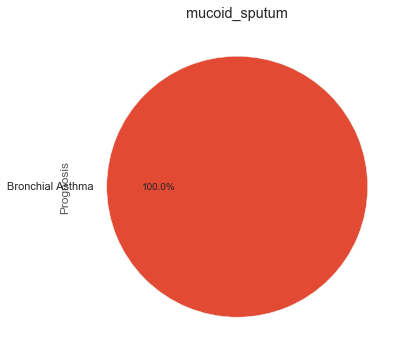

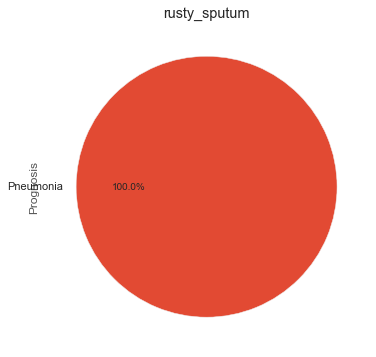

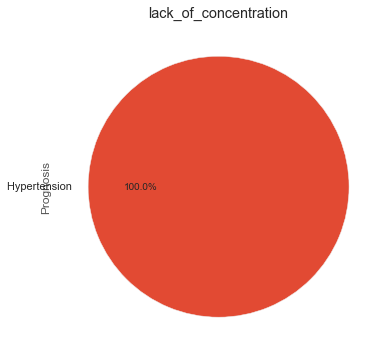

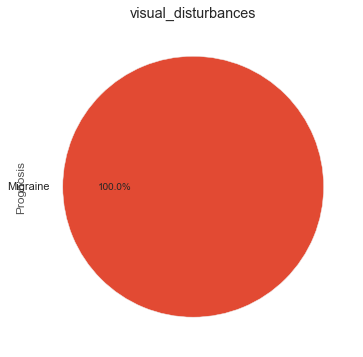

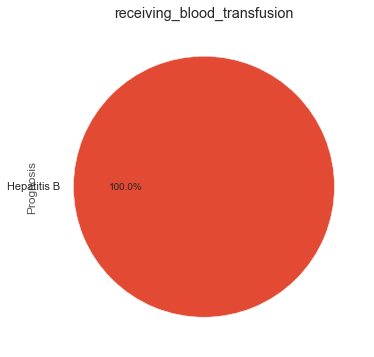

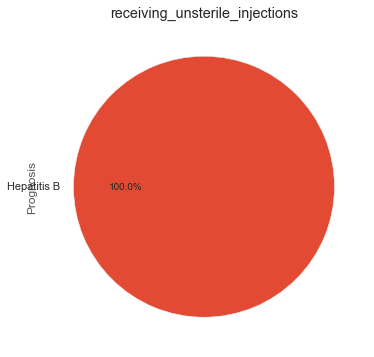

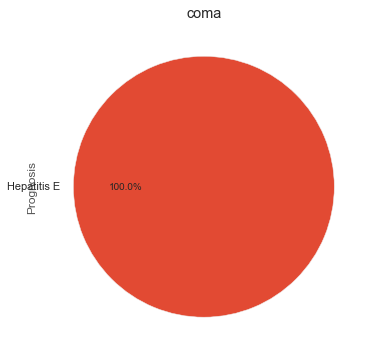

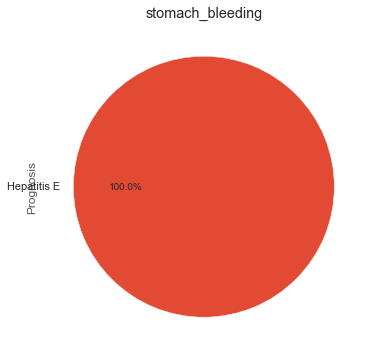

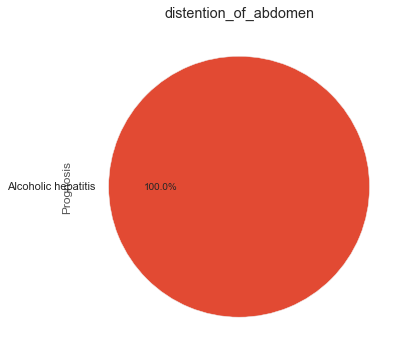

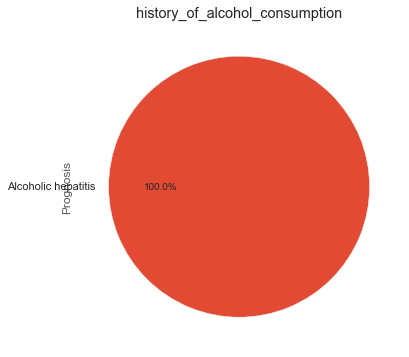

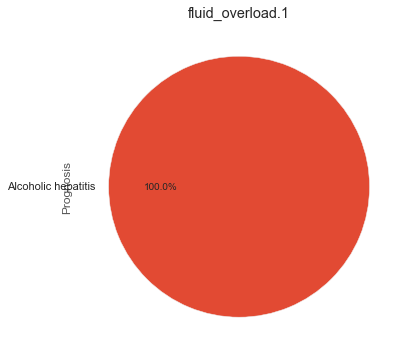

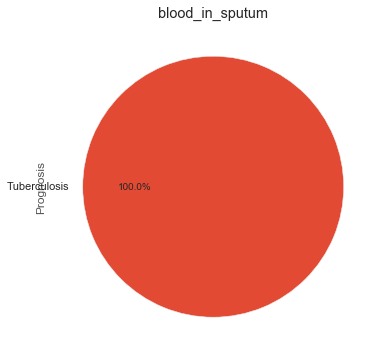

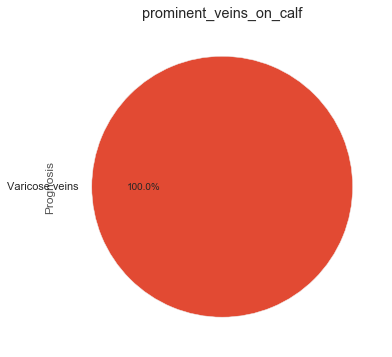

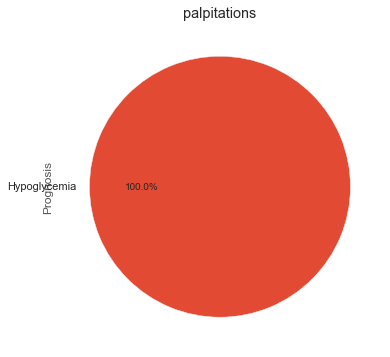

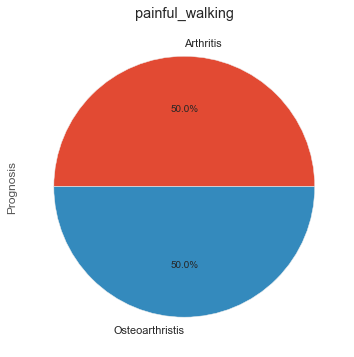

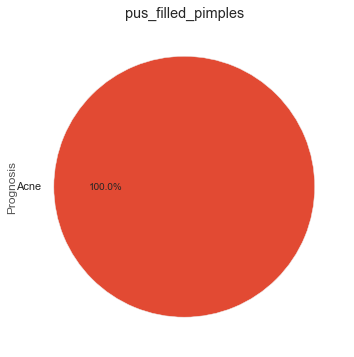

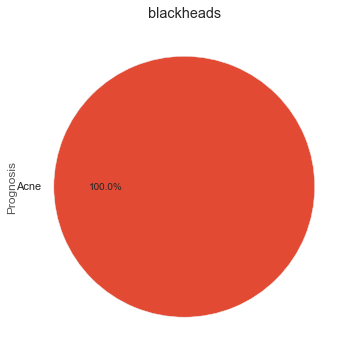

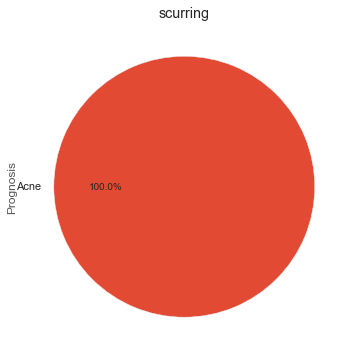

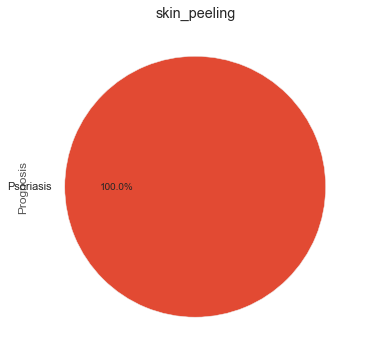

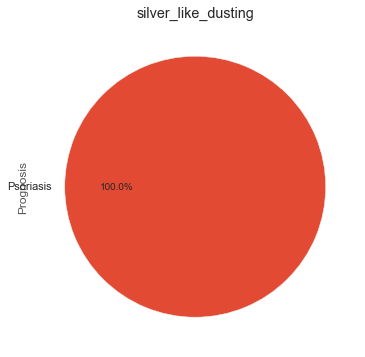

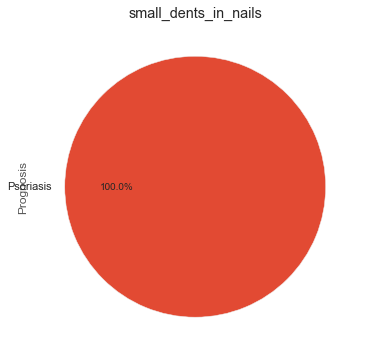

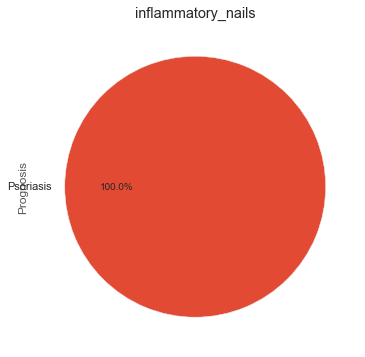

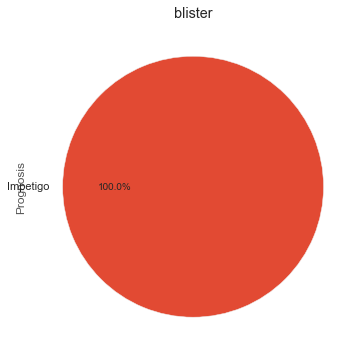

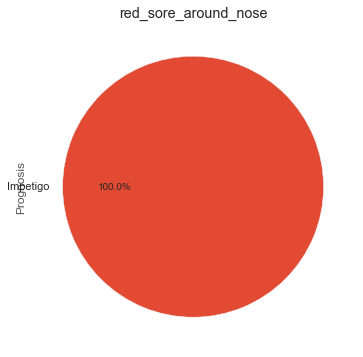

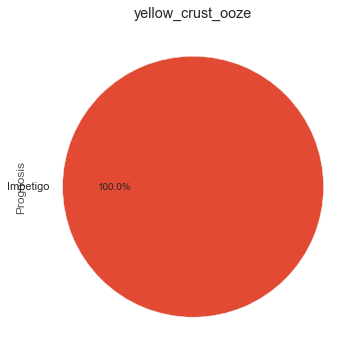

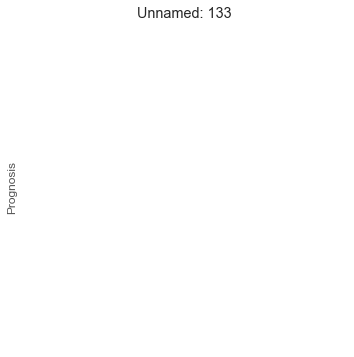

In [78]:

pdf = PdfPages('Symtoms vs Prognosis.pdf')
for symptom_name in df_train:
    if symptom_name != 'prognosis':
        chart = visualize_symptom(symptom_name)
        pdf.savefig(chart.get_figure())
pdf.close()        

## Train for Custom Training Data

In [134]:
x = df_train.drop(['prognosis','Unnamed: 133'],axis =1)
y = df_train['prognosis']

In [135]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

## Multinomial Naive Bayes

In [136]:
#imported naive_baye algorithm
from sklearn.naive_bayes import MultinomialNB

#fitted the model
mnb = MultinomialNB()
mnb = mnb.fit(x_train, y_train)

score = mnb.score(x_test, y_test)
print("Accuracy Score: ",score)

Accuracy Score:  1.0


In [137]:
#by cross validating we got mean also 100%
from sklearn.model_selection import cross_val_score
scores = cross_val_score(mnb, x_test, y_test, cv=5)
print (scores)
print (scores.mean())

[1. 1. 1. 1. 1.]
1.0


## K-Fold Cross-Validation

In [138]:
#by cross validating we got mean also 100%
from sklearn.model_selection import cross_val_score
scores = cross_val_score(mnb, x_test, y_test, cv=5)
print (scores)
print (scores.mean())

[1. 1. 1. 1. 1.]
1.0


In [139]:
real_diseases = y_test.values
y_pred = mnb.predict(x_test)
#for the cross checking purpose i want to see if predicted values and actual values are same else it gives me worng prediction 
for i in range(0, 20):
    if y_pred[i] == real_diseases[i]:
        print ('Pred: {0} Actual:{1}'.format(y_pred[i], real_diseases[i]))
    else:
        print('worng prediction')
        print ('Pred: {0} Actual:{1}'.format(y_pred[i], real_diseases[i]))

Pred: Acne Actual:Acne
Pred: Acne Actual:Acne
Pred: Hyperthyroidism Actual:Hyperthyroidism
Pred: AIDS Actual:AIDS
Pred: Chronic cholestasis Actual:Chronic cholestasis
Pred: Hypertension  Actual:Hypertension 
Pred: Hypoglycemia Actual:Hypoglycemia
Pred: Arthritis Actual:Arthritis
Pred: Hepatitis B Actual:Hepatitis B
Pred: Migraine Actual:Migraine
Pred: Urinary tract infection Actual:Urinary tract infection
Pred: Diabetes  Actual:Diabetes 
Pred: Hepatitis D Actual:Hepatitis D
Pred: Psoriasis Actual:Psoriasis
Pred: Alcoholic hepatitis Actual:Alcoholic hepatitis
Pred: Alcoholic hepatitis Actual:Alcoholic hepatitis
Pred: Dimorphic hemmorhoids(piles) Actual:Dimorphic hemmorhoids(piles)
Pred: Hepatitis E Actual:Hepatitis E
Pred: Diabetes  Actual:Diabetes 
Pred: Cervical spondylosis Actual:Cervical spondylosis


## KNN Classifier

In [140]:
from sklearn.neighbors import KNeighborsClassifier
n_neighbors = 40
model = KNeighborsClassifier(n_neighbors=n_neighbors)

# Train the model using the training sets
model.fit(features,label)

#Predict Output
predicted= model.predict(features)
print(predicted)

NameError: name 'features' is not defined

## K-Fold Cross-Validation on KNN

In [141]:
#by cross validating we got mean also 100%
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, x_test, y_test, cv=4)
print (scores)
print (scores.mean())

[1. 1. 1. 1.]
1.0


In [315]:
real_diseases = y_test.values
y_pred = model.predict(x_test)
#for the cross checking purpose i want to see if predicted values and actual values are same else it gives me worng prediction 
for i in range(0, 20):
    if y_pred[i] == real_diseases[i]:
        print ('Pred: {0} Actual:{1}'.format(y_pred[i], real_diseases[i]))
    else:
        print('worng prediction')
        print ('Pred: {0} Actual:{1}'.format(y_pred[i], real_diseases[i]))

Pred: Acne Actual:Acne
Pred: Acne Actual:Acne
Pred: Hyperthyroidism Actual:Hyperthyroidism
Pred: AIDS Actual:AIDS
Pred: Chronic cholestasis Actual:Chronic cholestasis
Pred: Hypertension  Actual:Hypertension 
Pred: Hypoglycemia Actual:Hypoglycemia
Pred: Arthritis Actual:Arthritis
Pred: Hepatitis B Actual:Hepatitis B
Pred: Migraine Actual:Migraine
Pred: Urinary tract infection Actual:Urinary tract infection
Pred: Diabetes  Actual:Diabetes 
Pred: Hepatitis D Actual:Hepatitis D
Pred: Psoriasis Actual:Psoriasis
Pred: Alcoholic hepatitis Actual:Alcoholic hepatitis
Pred: Alcoholic hepatitis Actual:Alcoholic hepatitis
Pred: Dimorphic hemmorhoids(piles) Actual:Dimorphic hemmorhoids(piles)
Pred: Hepatitis E Actual:Hepatitis E
Pred: Diabetes  Actual:Diabetes 
Pred: Cervical spondylosis Actual:Cervical spondylosis


## Binary classfication by pycaret

In [136]:
#load the pycaret module
from pycaret.classification import *
data = df_train.sample(frac=0.95, random_state=786)
data_unseen = df_train.drop(df_train.index)
df_train.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (4674, 134)
Unseen Data For Predictions: (0, 134)


In [182]:
from pycaret.classification import *
exp_name = setup(data = data,  target = 'prognosis',session_id=123)


SystemExit: (Value Error): Target parameter doesnt exist in the data provided.

In [140]:
best_model = compare_models()

## K Neighbors Classifier

In [141]:
knn = create_model('knn')

In [156]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [222]:
rf = create_model('rf')

In [223]:
rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

In [224]:
tuned_rf = tune_model(rf)

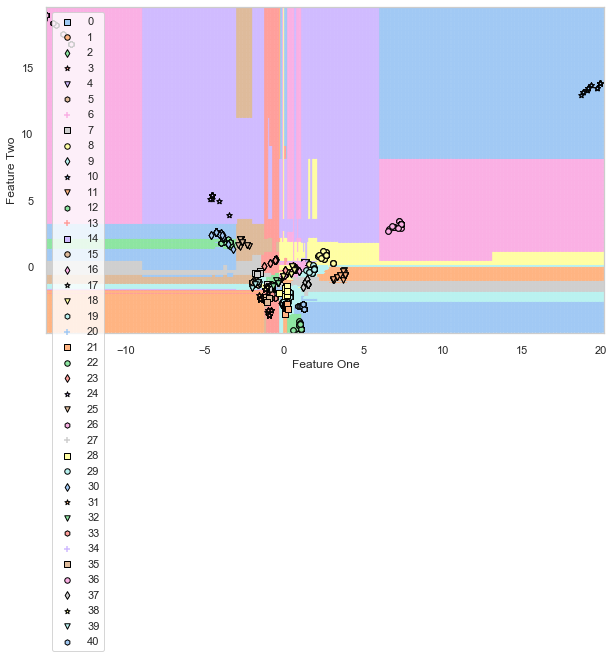

In [317]:
plot_model(tuned_rf, plot = 'boundary')

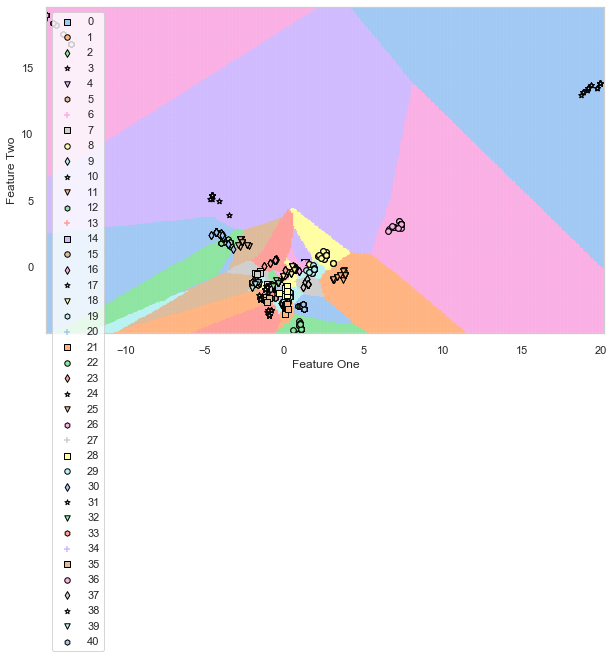

In [318]:
plot_model(tuned_knn, plot = 'boundary')

## Tune the model

In [143]:
import numpy as np
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

## Plot a Model

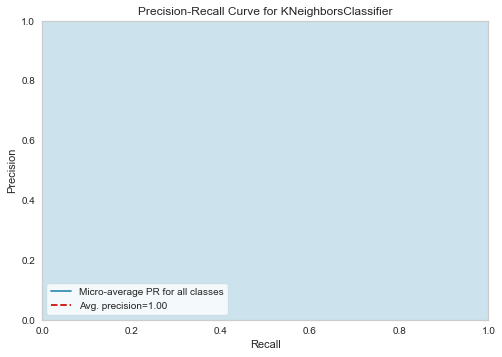

In [145]:
plot_model(tuned_knn, plot = 'pr')

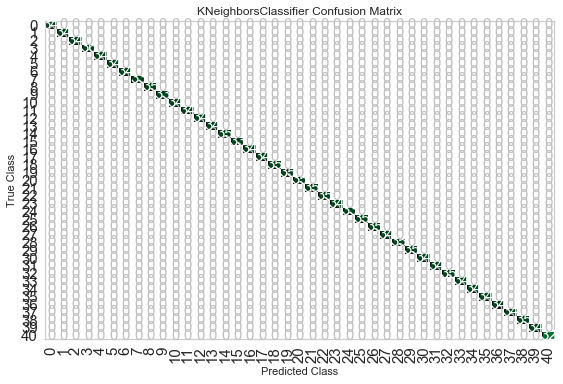

In [157]:
plot_model(tuned_knn, plot='confusion_matrix')

In [150]:
predict_model(tuned_knn)

Model  Accuracy  AUC  Recall  Prec.   F1  Kappa  MCC
0  K Neighbors Classifier       1.0    0     1.0    1.0  1.0    1.0  1.0

itching_0  itching_1  skin_rash_0  skin_rash_1  nodal_skin_eruptions_0  \
0           1.0        0.0          1.0          0.0                     1.0   
1           1.0        0.0          1.0          0.0                     1.0   
2           1.0        0.0          1.0          0.0                     1.0   
3           1.0        0.0          1.0          0.0                     1.0   
4           1.0        0.0          1.0          0.0                     1.0   
...         ...        ...          ...          ...                     ...   
1398        1.0        0.0          1.0          0.0                     1.0   
1399        1.0        0.0          1.0          0.0                     1.0   
1400        1.0        0.0          1.0          0.0                     1.0   
1401        1.0        0.0          1.0          0.0                     1.0   
1402        1.0        0.0          1.0          0.0                     1.0   

      nodal_skin_eruptions_1  continuous_sneezing_0  continuous_sneezing_1  \
0                        0.0                    1.0                    0.0   
1                        0.0                    1.0                    0.0   
2                        0.0                    1.0                    0.0   
3                        0.0                    1.0                    0.0   
4                        0.0                    0.0                    1.0   
...                      ...                    ...                    ...   
1398                     0.0                    1.0                    0.0   
1399                     0.0                    1.0                    0.0   
1400                     0.0                    1.0                    0.0   
1401                     0.0                    1.0                    0.0   
1402                     0.0                    1.0                    0.0   

      shivering_0  shivering_1  ...  inflammatory_nails_1  blister_0  \
0             1.0          0.0  ...                   0.0        1.0   
1             1.0          0.0  ...                   0.0        1.0   
2             1.0          0.0  ...                   0.0        1.0   
3             1.0          0.0  ...                   0.0        1.0   
4             1.0          0.0  ...                   0.0        1.0   
...           ...          ...  ...                   ...        ...   
1398          1.0          0.0  ...                   0.0        1.0   
1399          1.0          0.0  ...                   0.0        1.0   
1400          1.0          0.0  ...                   0.0        1.0   
1401          1.0          0.0  ...                   0.0        1.0   
1402          1.0          0.0  ...                   0.0        1.0   

      blister_1  red_sore_around_nose_0  red_sore_around_nose_1  \
0           0.0                     1.0                     0.0   
1           0.0                     1.0                     0.0   
2           0.0                     1.0                     0.0   
3           0.0                     1.0                     0.0   
4           0.0                     1.0                     0.0   
...         ...                     ...                     ...   
1398        0.0                     1.0                     0.0   
1399        0.0                     1.0                     0.0   
1400        0.0                     1.0                     0.0   
1401        0.0                     1.0                     0.0   
1402        0.0                     1.0                     0.0   

      yellow_crust_ooze_0  yellow_crust_ooze_1                prognosis  \
0                     1.0                  0.0                 Migraine   
1                     1.0                  0.0         Bronchial Asthma   
2                     1.0                  0.0     Cervical spondylosis   
3                     1.0                  0.0                 Migraine   
4                     1.0                  0.0              Com

In [151]:
final_knn = finalize_model(tuned_knn)
data=

In [153]:
unseen_predictions = predict_model(final_knn, data=df_test)
unseen_predictions.head()

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          0                     0                    1          1   
2        0          0                     0                    0          0   
3        1          0                     0                    0          0   
4        1          1                     0                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0                 0  ...   
1       1           0             0        0                 0  ...   
2       0           0             1        1                 1  ...   
3       0           0             0        0                 0  ...   
4       0           0             1        0                 0  ...   

   skin_peeling  silver_like_dusting  small_dents_in_nails  \
0             0                    0                     0   
1             0                    0                     0   
2             0                    0                     0   
3             0                    0                     0   
4             0                    0                     0   

   inflammatory_nails  blister  red_sore_around_nose  yellow_crust_ooze  \
0                   0        0                     0                  0   
1                   0        0                     0                  0   
2                   0        0                     0                  0   
3                   0        0                     0                  0   
4                   0        0                     0                  0   

             prognosis                Label  Score  
0     Fungal infection     Fungal infection    1.0  
1              Allergy              Allergy    1.0  
2                 GERD                 GERD    1.0  
3  Chronic cholestasis  Chronic cholestasis    1.0  
4        Drug Reaction        Drug Reaction    1.0  

[5 rows x 135 columns]

In [155]:
from pycaret.utils import check_metric
check_metric(unseen_predictions['prognosis'], unseen_predictions['Label'], metric = 'Accuracy')

1.0

In [322]:
check_metric(unseen_predictions['prognosis'], unseen_predictions['Label'], metric = 'Kappa')

1.0

## Neural Network

In [5]:
from keras.models import Sequential
import tensorflow as tf
from keras.layers import Dense

In [6]:
import tensorflow as tf

In [7]:
print(tf.__version__)

2.4.0


In [129]:
df_train = pd.read_csv(train_file, skipinitialspace=True, engine="python")

In [130]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 134 entries, itching to Unnamed: 133
dtypes: float64(1), int64(132), object(1)
memory usage: 5.0+ MB


In [131]:
df_train.dtypes

itching                   int64
skin_rash                 int64
nodal_skin_eruptions      int64
continuous_sneezing       int64
shivering                 int64
                         ...   
blister                   int64
red_sore_around_nose      int64
yellow_crust_ooze         int64
prognosis                object
Unnamed: 133            float64
Length: 134, dtype: object

In [14]:
X =result.drop(['prognosis','Unnamed: 133'],axis =1)
y = np.array(result['prognosis'])

In [15]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
vec = label_encoder.fit_transform(y)


from keras.utils import to_categorical
y = to_categorical(vec)

In [16]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [13]:
frames = [df_train, df_test]

result = pd.concat(frames)
result.shape


(4962, 134)

In [17]:
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size = 0.3 , random_state = 0 ) 

In [18]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
classifier = Sequential() 
classifier.add(Dense(activation = "relu", input_dim = 132,  
                     units = 8, kernel_initializer = "uniform",dtype=None)) 
classifier.add(Dense(activation = "relu", units = 14,  
                     kernel_initializer = "uniform",dtype=None)) 
classifier.add(Dense(activation = "sigmoid", units = 41,  
                     kernel_initializer = "uniform",dtype=None)) 
classifier.compile(optimizer = 'Adam' , loss = 'binary_crossentropy',  
                   metrics = ['accuracy'] ) 

In [20]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 1064      
_________________________________________________________________
dense_1 (Dense)              (None, 14)                126       
_________________________________________________________________
dense_2 (Dense)              (None, 41)                615       
Total params: 1,805
Trainable params: 1,805
Non-trainable params: 0
_________________________________________________________________


In [21]:
history= classifier.fit(X_train , y_train , batch_size = 8 ,epochs = 100,validation_split=0.33,verbose=0 ) 

In [22]:
Y_pred_nn = classifier.predict(X_test)

In [23]:
Y_pred_nn.shape

(1489, 41)

In [24]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


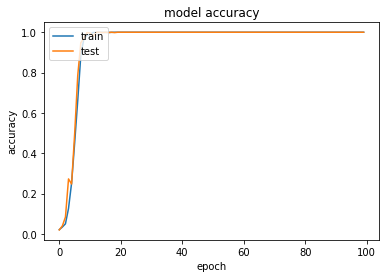

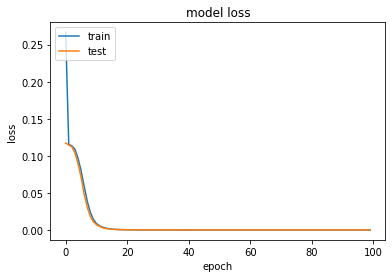

In [29]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [26]:
rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded

In [27]:
y_test = [round(x[0]) for x in y_test]

In [28]:
score_nn = round(accuracy_score(Y_pred_nn, y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")

The accuracy score achieved using Neural Network is: 100.0 %


In [59]:
df_symtoms =df_train.groupby("itching").size().reset_index(name='counts')

In [60]:
df_symtoms

itching  counts
0        0    4242
1        1     678